# Обучение с учителем: качество модели

**Описание проекта**

Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.

«В один клик» — современная компания, поэтому её руководство не хочет принимать решения просто так — только на основе анализа данных и бизнес-моделирования. У компании есть небольшой отдел цифровых технологий, и вам предстоит побыть в роли стажёра в этом отделе.

Итак, вашему отделу поручили разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

**Подход к решению поставленной задачи:**
1. Нужно промаркировать уровень финансовой активности постоянных покупателей. В компании принято выделять два уровня активности: **«снизилась»**, если клиент стал покупать меньше товаров, и **«прежний уровень»**.
2. Нужно собрать данные по клиентам по следующим группам:
    - Признаки, которые описывают коммуникацию сотрудников компании с клиентом.
    - Признаки, которые описывают продуктовое поведение покупателя *(например, какие товары покупает и как часто)*.
    - Признаки, которые описывают покупательское поведение клиента *(например, сколько тратил в магазине)*.
    - Признаки, которые описывают поведение покупателя на сайте *(например, как много страниц просматривает и сколько времени проводит на сайте)*.

**Цели исследования:**

1. Изучить имеющиеся данные и подготовить их для дальнейшего обучения моделей
2. Разработать такую модель, которая предскажет вероятность снижения покупательской активности клиента в следующие три месяца
3. Используя данные модели и данные о прибыльности клиентов, выделить сегменты покупателей и разработать для них персонализированные предложения, чтобы увеличить их покупательскую активность

**Описание данных**

В проекте будут использованы **четыре** датасета:

1. **`market_file.csv`** - содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.
- **id** - номер покупателя в корпоративной базе данных.
- **Покупательская активность** - рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».
- **Тип сервиса** - уровень сервиса, например «премиум» и «стандарт».
- **Разрешить сообщать** - информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.
- **Маркет_актив_6мес** - среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
- **Маркет_актив_тек_мес** - количество маркетинговых коммуникаций в текущем месяце.
- **Длительность** - значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
- **Акционные_покупки** - среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
- **Популярная_категория** - самая популярная категория товаров у покупателя за последние 6 месяцев.
- **Средний_просмотр_категорий_за_визит** - показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
- **Неоплаченные_продукты_штук_квартал** - общее число неоплаченных товаров в корзине за последние 3 месяца.
- **Ошибка_сервиса** - число сбоев, которые коснулись покупателя во время посещения сайта.
- **Страниц_за_визит** - среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.
2. **`market_money.csv`** - содержит данные о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.
- **id** — номер покупателя в корпоративной базе данных.
- **Период** — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.
- **Выручка** — сумма выручки за период.
3. **`market_time.csv`** - содержит данные о времени (в минутах), которое покупатель провёл на сайте в течение периода.
- **id** — номер покупателя в корпоративной базе данных.
- **Период** — название периода, во время которого зафиксировано общее время.
- **минут** — значение времени, проведённого на сайте, в минутах.
4. **`money.csv`** - содержит данные о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.
- **id** — номер покупателя в корпоративной базе данных.
- **Прибыль** — значение прибыли.

## Загрузка данных.

In [1]:
# устанавливаем библиотеку phik
!pip install phik -q

In [2]:
# устанавливаем библиотеку shap
!pip install shap -q

In [3]:
# устанавливаем библиотеку mlxtend
!pip install mlxtend -q

In [4]:
# импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from phik import phik_matrix
from phik.report import plot_correlation_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.dummy import DummyClassifier
from sklearn.inspection import permutation_importance
from sklearn.pipeline import Pipeline

from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import (
    OneHotEncoder, 
    OrdinalEncoder, 
    StandardScaler, 
    MinMaxScaler, 
    RobustScaler
)

from sklearn.metrics import (
    f1_score, 
    roc_auc_score, 
    accuracy_score, 
    precision_score, 
    recall_score, 
    confusion_matrix, 
    ConfusionMatrixDisplay, 
    classification_report)

from mlxtend.plotting import plot_decision_regions

In [5]:
df_market_file = pd.read_csv('/datasets/market_file.csv', sep=',', decimal='.')
df_market_money = pd.read_csv('/datasets/market_money.csv', sep=',', decimal='.')
df_market_time = pd.read_csv('/datasets/market_time.csv', sep=',', decimal='.')
df_money = pd.read_csv('/datasets/money.csv', sep=';', decimal=',')

In [6]:
# Изучим датасет  df_market_file
df_market_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

In [7]:
df_market_file['Покупательская активность'].unique()

array(['Снизилась', 'Прежний уровень'], dtype=object)

In [8]:
df_market_file['Тип сервиса'].unique()

array(['премиум', 'стандартт', 'стандарт'], dtype=object)

In [9]:
df_market_file['Разрешить сообщать'].unique()

array(['да', 'нет'], dtype=object)

In [10]:
df_market_file['Популярная_категория'].unique()

array(['Товары для детей', 'Домашний текстиль', 'Косметика и аксесуары',
       'Техника для красоты и здоровья', 'Кухонная посуда',
       'Мелкая бытовая техника и электроника'], dtype=object)

В df_market_file встречаются такие значения как:
- "Косметика и аксесуары" - пропущена вторая буква "с" в слове "аксессуары"
- "стандартт" - двойная буква т в конце слова

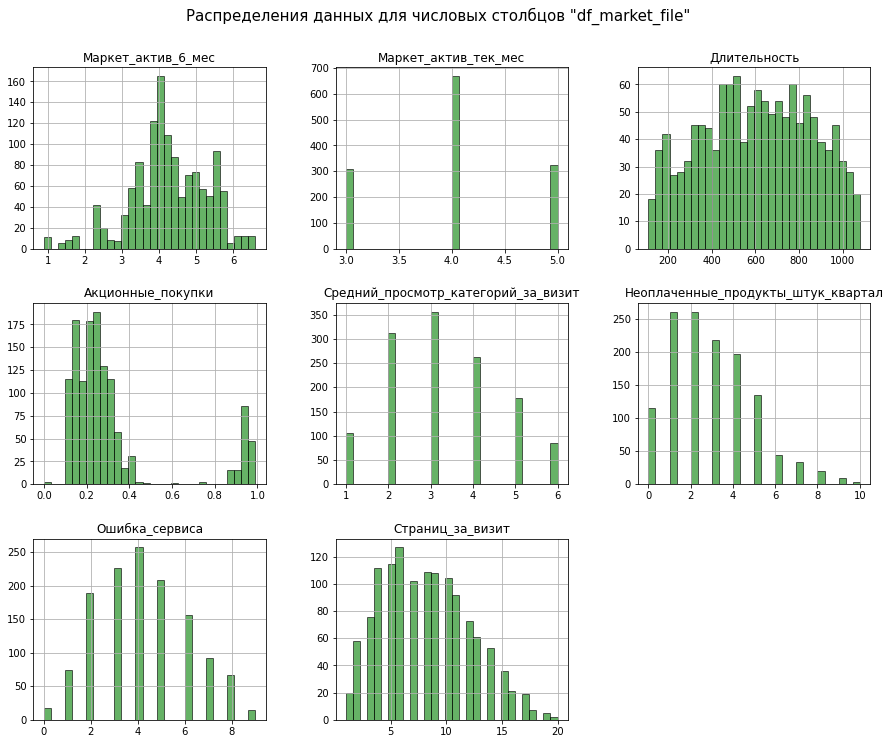

In [11]:
# выведем на экран гистограмму для всех числовых столбцов df_market_file
df_market_file.drop('id', axis=1).hist(figsize=(15, 12), ec='black', alpha=0.6, lw=1, color='g', bins=30)
plt.suptitle('Распределения данных для числовых столбцов "df_market_file"', size=15, y=0.95);

Большинство распределений похожи на **нормальные**, за исключением признаков:
* **Маркет_актив_тек_мес** - тут наблюдения распределяются только на *три варианта (**3, 4 и 5**)*;
* **Акционные_покупки** - *бимодальное* распределение.

In [12]:
df_market_file.head()

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


In [13]:
# Изучим датасет  df_market_money
df_market_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


In [14]:
df_market_money.head()

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


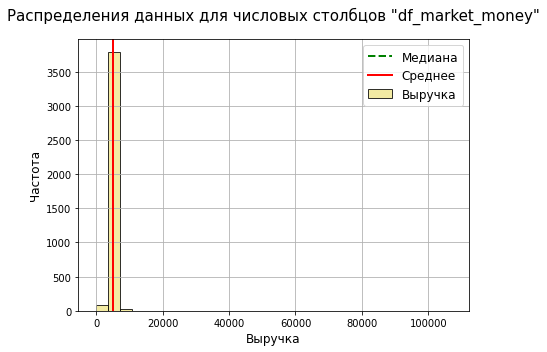

In [15]:
# выведем на экран гистограмму для всех числовых столбцов df_market_money
df_market_money.drop('id', axis=1).hist(figsize=(7, 5), ec='black', alpha=0.8, lw=1, color='khaki', bins=30)
plt.title('Распределения данных для числовых столбцов "df_market_money"', size=15, y=1.05)
plt.axvline(df_market_money['Выручка'].median(), color='g', linestyle='dashed', linewidth=2)
plt.axvline(df_market_money['Выручка'].mean(), color='r', linestyle='-', linewidth=2)
plt.legend(['Медиана', 'Среднее', 'Выручка'], prop={'size': 12})
plt.xlabel('Выручка', size=12)
plt.ylabel('Частота', size=12);

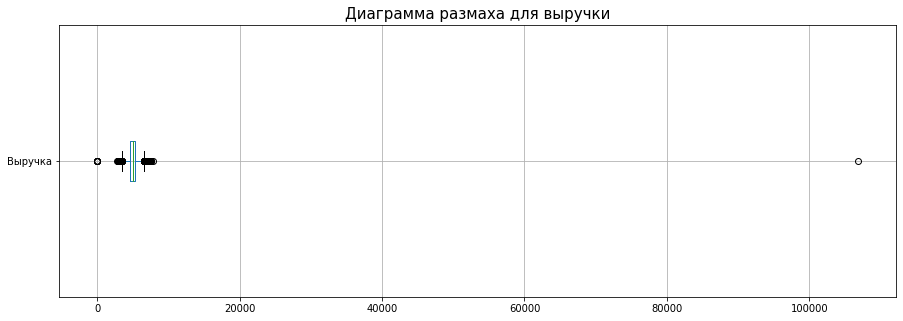

In [16]:
# построим диаграмму размаха для 'Выручка'
df_market_money.boxplot(column=['Выручка'], figsize=(15,5), grid=True, vert=False)
plt.title('Диаграмма размаха для выручки', size=15);

Видим **два аномальных значения**: **0.0** и выше 100000.

За рассматриваемый период покупатель мог как не совершать покупки вообще, так и совершить несколько нестандартных крупных покупок. Поэтому выбросы это или нет, сейчас рано судить. 

Но из-за этих двух значений имеем слишком мелкий масштаб на гистограмме.  
Попробуем посмотреть на распределение наблюдений без этих двух значений.

In [17]:
# выведем строки с аномальными значениями выручки
df_market_money.query('Выручка > 100000 or Выручка == 0')

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
2,215348,предыдущий_месяц,0.0
28,215357,препредыдущий_месяц,0.0
29,215357,предыдущий_месяц,0.0
34,215359,предыдущий_месяц,0.0
35,215359,препредыдущий_месяц,0.0
98,215380,текущий_месяц,106862.2


In [18]:
# выводим на экран данные за разные периоды для пользователей c id: 215348, 215357, 215359, 215380 
df_market_money.query('id == 215348 or id == 215357 or id == 215359 or id == 215380')

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
27,215357,текущий_месяц,5986.3
28,215357,препредыдущий_месяц,0.0
29,215357,предыдущий_месяц,0.0
33,215359,текущий_месяц,4735.0
34,215359,предыдущий_месяц,0.0
35,215359,препредыдущий_месяц,0.0
96,215380,препредыдущий_месяц,5051.0


Пользователи с **id 215348, 215357** и **215359** начали совершать покупки на сайте только в текущем месяце.  
Это может быть из-за того, что:
- это могут быть новые пользователи
- этих пользователей могла одновременно привлечь в текущем месяца выгодная акция
- у этих пользователей нет нужны что-либо покупать каждый месяц

**id 215380** - этот пользователь, наоборот, показывает активность каждый месяц. Однако в текущем месяце выручка с данного пользователя более чем в **19 раз выше**, чем средняя за предыдущие периоды. Похоже на выброс.

Медиана: 4957.5
Среднее: 5025.696


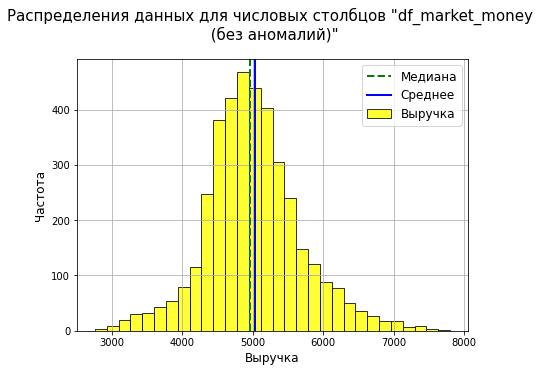

In [19]:
# построим гистограмму для выручки, но уже без аномальных значений 0.0 и 106862.2
(df_market_money
 .query('0 < Выручка < 106862.0')
 .drop('id', axis=1)
 .hist(
     figsize=(7, 5), 
     ec='black', 
     alpha=0.8, 
     lw=1, 
     color='yellow', 
     bins=30, 
     legend=True)
)
plt.title('Распределения данных для числовых столбцов "df_market_money \n (без аномалий)"', size=15, y=1.05)
plt.axvline(df_market_money['Выручка'].median(), color='g', linestyle='dashed', linewidth=2)
plt.axvline(df_market_money['Выручка'].mean(), color='b', linestyle='-', linewidth=2)
plt.legend(['Медиана', 'Среднее', 'Выручка'], prop={'size': 12})
plt.xlabel('Выручка', size=12)
plt.ylabel('Частота', size=12);


# выводим на экран медиану и среднее
print('Медиана:', round(df_market_money['Выручка'].median(), 3))
print('Среднее:', round(df_market_money['Выручка'].mean(), 3))

Наблюдаем нормальное распределение наблюдений.

In [20]:
df_market_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


In [21]:
df_market_time.head()

,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


In [22]:
df_market_time['Период'].unique()

array(['текущий_месяц', 'предыдцщий_месяц'], dtype=object)

В df_market_time встречаются такие значения как:
- встречаются такие значения как "предыдцщий_месяц"

Медиана: 13.0
Среднее: 13.336


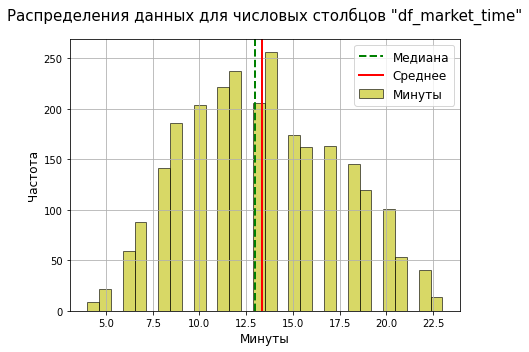

In [23]:
# выведем на экран гистограмму для всех числовых столбцов df_market_time
(df_market_time
 .drop('id', axis=1)
 .hist(
     figsize=(7, 5), 
     ec='black', 
     alpha=0.6, 
     lw=1, 
     color='y', 
     bins=30, 
     legend=True)
)
plt.title('Распределения данных для числовых столбцов "df_market_time"', size=15, y=1.05)
plt.axvline(df_market_time['минут'].median(), color='g', linestyle='dashed', linewidth=2)
plt.axvline(df_market_time['минут'].mean(), color='r', linestyle='-', linewidth=2)
plt.legend(['Медиана', 'Среднее', 'Минуты'], prop={'size': 12})
plt.xlabel('Минуты', size=12)
plt.ylabel('Частота', size=12);

# выводим на экран медиану и среднее
print('Медиана:', round(df_market_time['минут'].median(), 3))
print('Среднее:', round(df_market_time['минут'].mean(), 3))

Наблюдаем нормальное распределение наблюдений.

In [24]:
df_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


In [25]:
df_money.head()

,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


Медиана: 4.045
Среднее: 3.997


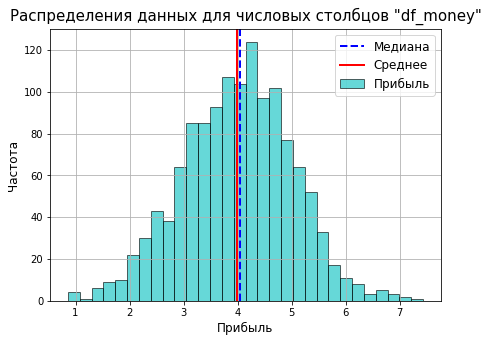

In [26]:
# выведем на экран гистограмму для всех числовых столбцов df_money
df_money.drop('id', axis=1).hist(figsize=(7, 5), ec='black', alpha=0.6, lw=1, color='c', bins=30, legend=True)
plt.title('Распределения данных для числовых столбцов "df_money"', size=15, y=1.01)
plt.axvline(df_money['Прибыль'].median(), color='b', linestyle='dashed', linewidth=2)
plt.axvline(df_money['Прибыль'].mean(), color='r', linestyle='-', linewidth=2)
plt.legend(['Медиана', 'Среднее', 'Прибыль'], prop={'size': 12})
plt.xlabel('Прибыль', size=12)
plt.ylabel('Частота', size=12);

# выводим на экран медиану и среднее
print('Медиана:', round(df_money['Прибыль'].median(), 3))
print('Среднее:', round(df_money['Прибыль'].mean(), 3))

Наблюдаем нормальное распределение наблюдений.

***Вывод по обзору данных:***

Изучили общую информацию и распределения числовых признаков в датафреймах с данными:
* **df_market_file** - о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении;
* **df_market_money** - о выручке, которую получает магазин с покупателя (сколько покупатель всего потратил за период взаимодействия с сайтом);
* **df_market_time** - о времени (в минутах), которое покупатель провёл на сайте в течение периода;
* **df_money** - о среднемесячной прибыли покупателя за последние 3 месяца (какую прибыль получает магазин от продаж каждому покупателю).

Данные в таблицах соответствуют своему описанию.  
Были обнаружены незначительные ошибки, которые будут исправлены на этапе предобработки.

## Предобработка данных

In [27]:
# Приведем названия столбцов к единому стилю
df_list = [df_market_file, df_market_money, df_market_time, df_money]
for df in df_list:
    df.columns = [x.lower() for x in df.columns]
    df.columns = [x.replace(' ', '_') for x in df.columns]
    print(df.columns)

Index(['id', 'покупательская_активность', 'тип_сервиса', 'разрешить_сообщать',
       'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность',
       'акционные_покупки', 'популярная_категория',
       'средний_просмотр_категорий_за_визит',
       'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса',
       'страниц_за_визит'],
      dtype='object')
Index(['id', 'период', 'выручка'], dtype='object')
Index(['id', 'период', 'минут'], dtype='object')
Index(['id', 'прибыль'], dtype='object')


In [28]:
# проверим датафреймы на наличие пропусков
for df in df_list:
    print(df.isna().sum())

id                                     0
покупательская_активность              0
тип_сервиса                            0
разрешить_сообщать                     0
маркет_актив_6_мес                     0
маркет_актив_тек_мес                   0
длительность                           0
акционные_покупки                      0
популярная_категория                   0
средний_просмотр_категорий_за_визит    0
неоплаченные_продукты_штук_квартал     0
ошибка_сервиса                         0
страниц_за_визит                       0
dtype: int64
id         0
период     0
выручка    0
dtype: int64
id        0
период    0
минут     0
dtype: int64
id         0
прибыль    0
dtype: int64


In [29]:
# проверим типы данных во всех датафреймах
for df in df_list:
    print(df.dtypes)

id                                       int64
покупательская_активность               object
тип_сервиса                             object
разрешить_сообщать                      object
маркет_актив_6_мес                     float64
маркет_актив_тек_мес                     int64
длительность                             int64
акционные_покупки                      float64
популярная_категория                    object
средний_просмотр_категорий_за_визит      int64
неоплаченные_продукты_штук_квартал       int64
ошибка_сервиса                           int64
страниц_за_визит                         int64
dtype: object
id           int64
период      object
выручка    float64
dtype: object
id         int64
период    object
минут      int64
dtype: object
id           int64
прибыль    float64
dtype: object


У всех датафреймов данные соответствуют своему типу.

In [30]:
# проверим все датафреймы на наличие явных дубликатов
for df in df_list:
    print(df.duplicated().sum())

0
0
0
0


Явные дубликаты не обнаружены.

In [31]:
# проверим уникальные значения категориальных столбцов df_market_file
for col in df_market_file[df_market_file.select_dtypes(exclude='number').columns]:
    print(f'Уникальные значения столбца "{col}":\n')
    print(f'{df_market_file[col].value_counts()}\n')
    print(f'Количество уникальных значений столбца "{col}": {len(df_market_file[col].unique())}')

Уникальные значения столбца "покупательская_активность":

Прежний уровень    802
Снизилась          498
Name: покупательская_активность, dtype: int64

Количество уникальных значений столбца "покупательская_активность": 2
Уникальные значения столбца "тип_сервиса":

стандарт     914
премиум      376
стандартт     10
Name: тип_сервиса, dtype: int64

Количество уникальных значений столбца "тип_сервиса": 3
Уникальные значения столбца "разрешить_сообщать":

да     962
нет    338
Name: разрешить_сообщать, dtype: int64

Количество уникальных значений столбца "разрешить_сообщать": 2
Уникальные значения столбца "популярная_категория":

Товары для детей                        330
Домашний текстиль                       251
Косметика и аксесуары                   223
Техника для красоты и здоровья          184
Мелкая бытовая техника и электроника    174
Кухонная посуда                         138
Name: популярная_категория, dtype: int64

Количество уникальных значений столбца "популярная_категория

In [32]:
# переименуем отдельные значения столбцов 'тип_сервиса' и 'популярная_категория'
df_market_file['тип_сервиса'] = df_market_file['тип_сервиса'].str.replace('стандартт', 'стандарт')
df_market_file['популярная_категория'] = df_market_file['популярная_категория'].str.replace('Косметика и аксесуары', 
                                                                                            'Косметика и аксессуары')

# проверяем 
print(df_market_file['тип_сервиса'].unique())
print(df_market_file['популярная_категория'].unique())

['премиум' 'стандарт']
['Товары для детей' 'Домашний текстиль' 'Косметика и аксессуары'
 'Техника для красоты и здоровья' 'Кухонная посуда'
 'Мелкая бытовая техника и электроника']


In [33]:
# проверим уникальные значения категориальных столбцов df_market_money
for col in df_market_money[df_market_money.select_dtypes(exclude='number').columns]:
    print(f'Уникальные значения столбца "{col}":\n')
    print(f'{df_market_money[col].value_counts()}\n')
    print(f'Количество уникальных значений столбца "{col}": {len(df_market_money[col].unique())}')

Уникальные значения столбца "период":

текущий_месяц          1300
предыдущий_месяц       1300
препредыдущий_месяц    1300
Name: период, dtype: int64

Количество уникальных значений столбца "период": 3


In [34]:
# переименуем отдельные значения столбца 'период'
df_market_money['период'] = df_market_money['период'].str.replace('препредыдущий_месяц', 'предпредыдущий_месяц')

# проверяем 
print(df_market_money['период'].unique())

['предпредыдущий_месяц' 'текущий_месяц' 'предыдущий_месяц']


In [35]:
# проверим уникальные значения категориальных столбцов df_market_time
for col in df_market_time[df_market_time.select_dtypes(exclude='number').columns]:
    print(f'Уникальные значения столбца "{col}":\n')
    print(f'{df_market_time[col].value_counts()}\n')
    print(f'Количество уникальных значений столбца "{col}": {len(df_market_time[col].unique())}')

Уникальные значения столбца "период":

текущий_месяц       1300
предыдцщий_месяц    1300
Name: период, dtype: int64

Количество уникальных значений столбца "период": 2


In [36]:
# переименуем отдельные значения столбец 'период'
df_market_time['период'] = df_market_time['период'].str.replace('предыдцщий_месяц', 'предыдущий_месяц')

# проверяем 
print(df_market_time['период'].unique())

['текущий_месяц' 'предыдущий_месяц']


In [37]:
# выведем на экран типы данных в столбцах df_money
print(f'Типы данных столбцов "df_money":\n{df_money.dtypes}')

# проверим только столбец 'id'    
print('Количество уникальных значений столбца "id":', len(df_money['id'].unique()))

Типы данных столбцов "df_money":
id           int64
прибыль    float64
dtype: object
Количество уникальных значений столбца "id": 1300


**Вывод по предобработке данных:**

Датафреймы **`df_market_file`**, **`df_market_money`**, **`df_market_time`** и **`df_money`** были проверены:
- на наличие пропусков в данных
- на соответсвие данных своему типу
- на наличие явных и неявных дубликатов

---
В результате проверки:
- пропуски в данных обнаружены не были;

- типы данных во всех четырёх датафреймах корректны;


- явные дубликаты в имеющихся датафреймах отсутствуют;


- в датафрейме **df_market_file** были устранены неявные дубликаты в столбце **тип_сервиса**;


- в остальных датафреймах неявные дубликаты обнаружены не были.


## Исследовательский анализ данных

**Исследовательский анализ df_market_file**

In [38]:
# выведем на экран типы данных df_market_file
print(df_market_file.dtypes)

id                                       int64
покупательская_активность               object
тип_сервиса                             object
разрешить_сообщать                      object
маркет_актив_6_мес                     float64
маркет_актив_тек_мес                     int64
длительность                             int64
акционные_покупки                      float64
популярная_категория                    object
средний_просмотр_категорий_за_визит      int64
неоплаченные_продукты_штук_квартал       int64
ошибка_сервиса                           int64
страниц_за_визит                         int64
dtype: object


Столбец "маркет_актив_6_мес"


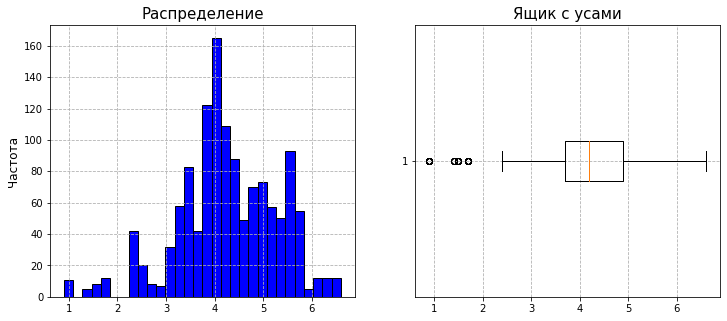

Описательная статистика:
count    1300.000000
mean        4.253769
std         1.014814
min         0.900000
25%         3.700000
50%         4.200000
75%         4.900000
max         6.600000
Name: маркет_актив_6_мес, dtype: float64
Столбец "маркет_актив_тек_мес"


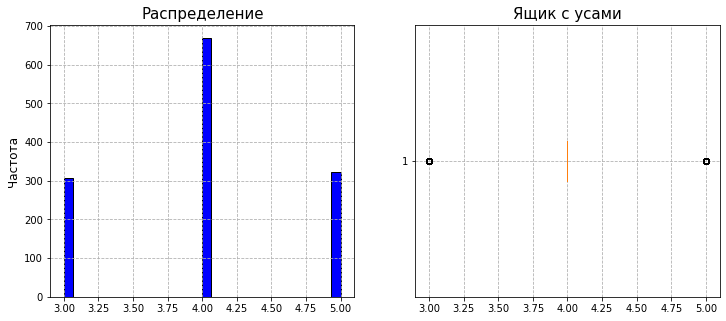

Описательная статистика:
count    1300.000000
mean        4.011538
std         0.696868
min         3.000000
25%         4.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: маркет_актив_тек_мес, dtype: float64
Столбец "длительность"


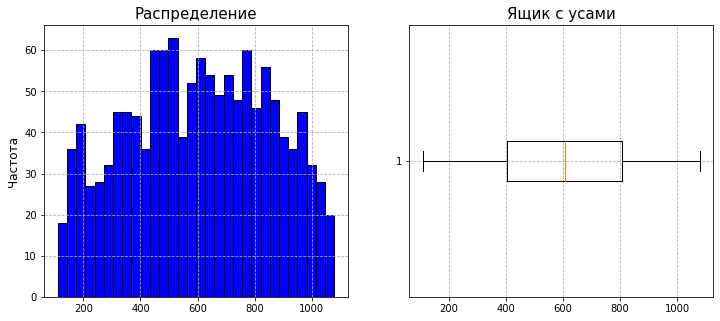

Описательная статистика:
count    1300.000000
mean      601.898462
std       249.856289
min       110.000000
25%       405.500000
50%       606.000000
75%       806.000000
max      1079.000000
Name: длительность, dtype: float64
Столбец "акционные_покупки"


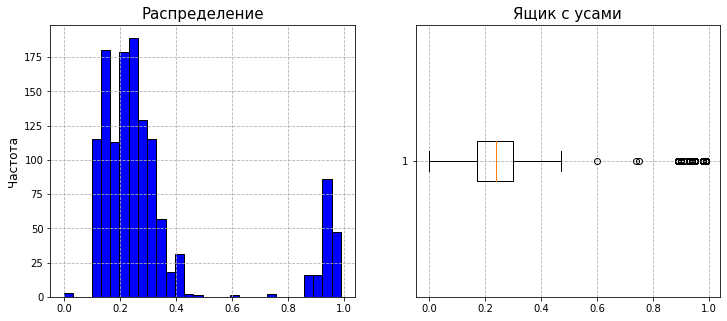

Описательная статистика:
count    1300.000000
mean        0.319808
std         0.249843
min         0.000000
25%         0.170000
50%         0.240000
75%         0.300000
max         0.990000
Name: акционные_покупки, dtype: float64
Столбец "средний_просмотр_категорий_за_визит"


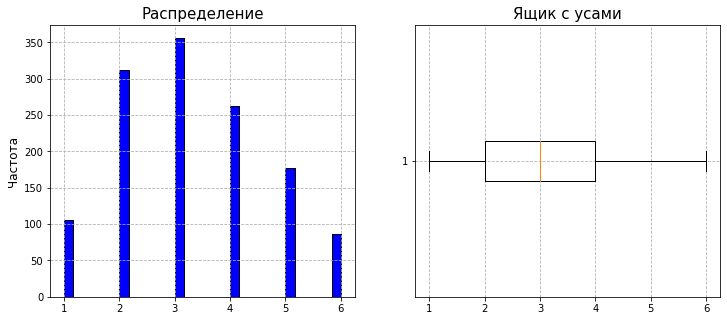

Описательная статистика:
count    1300.00000
mean        3.27000
std         1.35535
min         1.00000
25%         2.00000
50%         3.00000
75%         4.00000
max         6.00000
Name: средний_просмотр_категорий_за_визит, dtype: float64
Столбец "неоплаченные_продукты_штук_квартал"


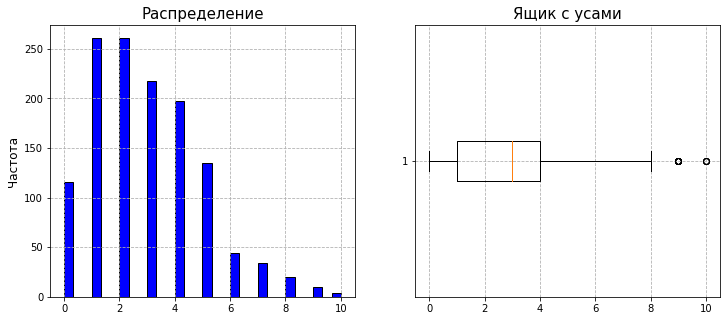

Описательная статистика:
count    1300.000000
mean        2.840000
std         1.971451
min         0.000000
25%         1.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: неоплаченные_продукты_штук_квартал, dtype: float64
Столбец "ошибка_сервиса"


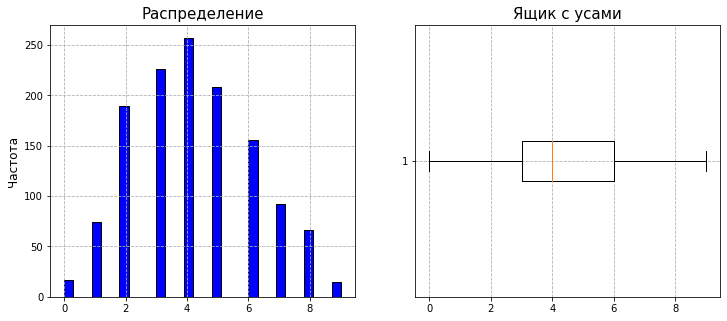

Описательная статистика:
count    1300.000000
mean        4.185385
std         1.955298
min         0.000000
25%         3.000000
50%         4.000000
75%         6.000000
max         9.000000
Name: ошибка_сервиса, dtype: float64
Столбец "страниц_за_визит"


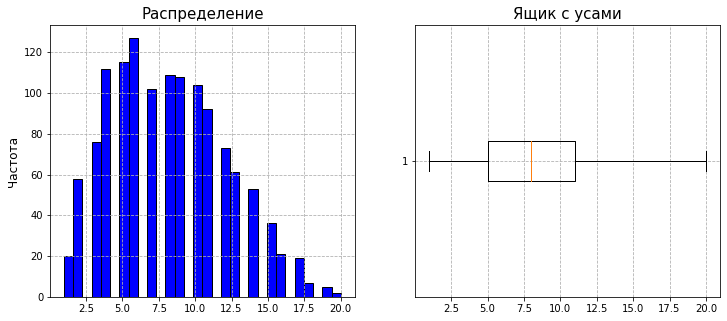

Описательная статистика:
count    1300.000000
mean        8.176923
std         3.978126
min         1.000000
25%         5.000000
50%         8.000000
75%        11.000000
max        20.000000
Name: страниц_за_визит, dtype: float64


In [39]:
# числовые столбцы df_market_file (без id)
df_market_file_num = df_market_file[df_market_file.select_dtypes(include='number').columns].drop(['id'], axis=1)

for i in df_market_file_num:
    print(f'Столбец "{i}"')
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    plt.subplot(1,2,1)
    plt.hist(df_market_file[i], bins=30, ec='black', lw=1, color='blue')
    plt.title('Распределение', size=15)
    plt.ylabel('Частота', size=12)
    plt.grid(linestyle='dashed')
    plt.subplot(1,2,2)
    plt.boxplot(df_market_file[i], vert=False)
    plt.title('Ящик с усами', size=15)
    plt.grid(linestyle='dashed')
    plt.show()
    print('Описательная статистика:')
    print(df_market_file[i].describe())
    plt.show()

Столбец "покупательская_активность"
Прежний уровень    802
Снизилась          498
Name: покупательская_активность, dtype: int64


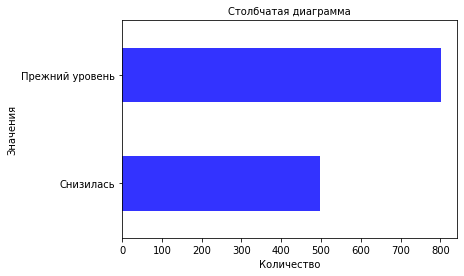

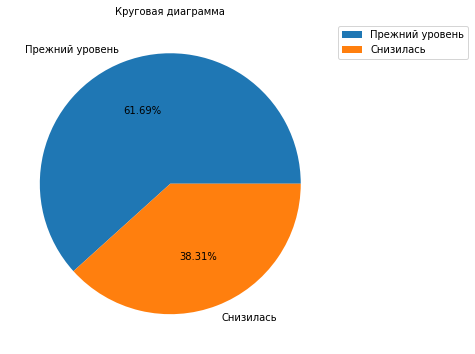

Столбец "тип_сервиса"
стандарт    924
премиум     376
Name: тип_сервиса, dtype: int64


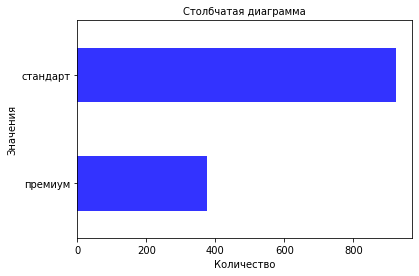

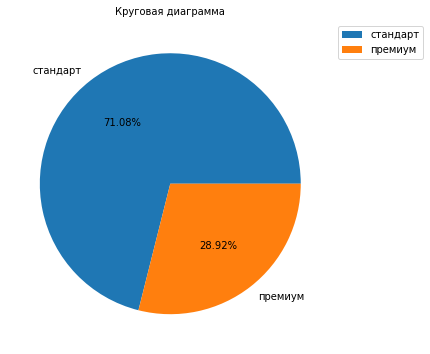

Столбец "разрешить_сообщать"
да     962
нет    338
Name: разрешить_сообщать, dtype: int64


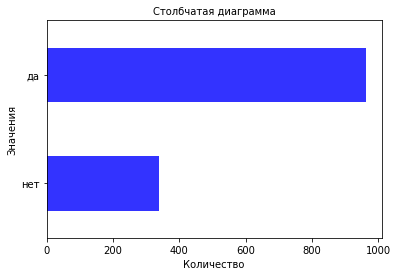

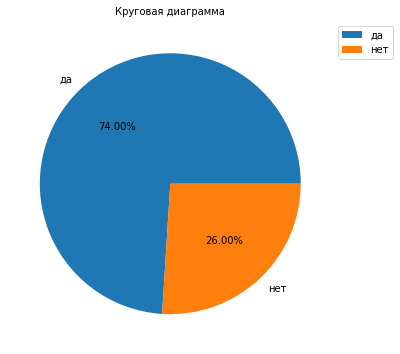

Столбец "популярная_категория"
Товары для детей                        330
Домашний текстиль                       251
Косметика и аксессуары                  223
Техника для красоты и здоровья          184
Мелкая бытовая техника и электроника    174
Кухонная посуда                         138
Name: популярная_категория, dtype: int64


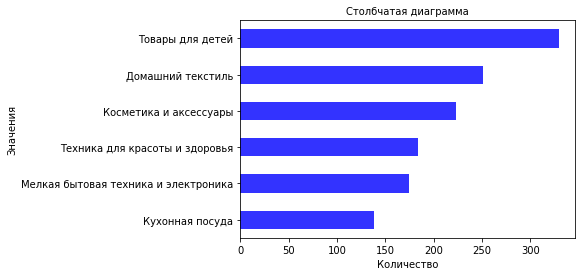

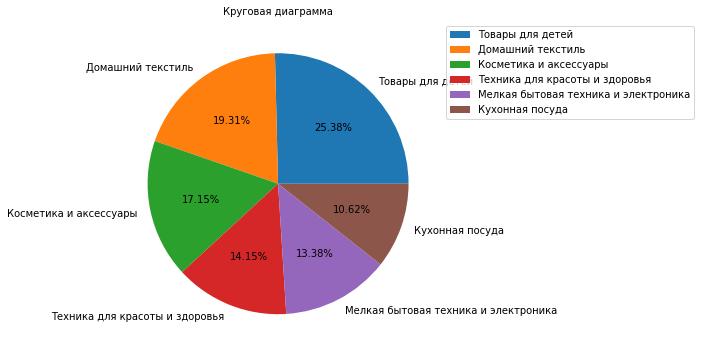

In [40]:
# категориальные столбцы df_market_file
df_market_file_cat = df_market_file[df_market_file.select_dtypes(exclude='number').columns]

for i in df_market_file_cat:
    print(f'Столбец "{i}"')
    print(df_market_file[i].value_counts())
    df_market_file[i].value_counts(ascending=True).plot(kind='barh', 
                             color='blue', 
                             alpha=0.8)
    plt.title('Столбчатая диаграмма', size=10)
    plt.xticks(rotation=0)
    plt.xlabel('Количество', size=10)
    plt.ylabel('Значения', size=10)
    plt.show()
    df_market_file[i].value_counts().plot(kind='pie', 
                             legend=True, 
                             autopct='%.2f%%',
                             figsize=(8, 6))
    plt.legend(bbox_to_anchor=(1, 1), prop={'size': 10})
    plt.title('Круговая диаграмма', size=10)
    plt.ylabel(None)
    plt.show()

**Исследовательский анализ df_market_money**

In [41]:
# выведем на экран типы данных df_market_money
print(df_market_money.dtypes)

id           int64
период      object
выручка    float64
dtype: object


Столбец "выручка"


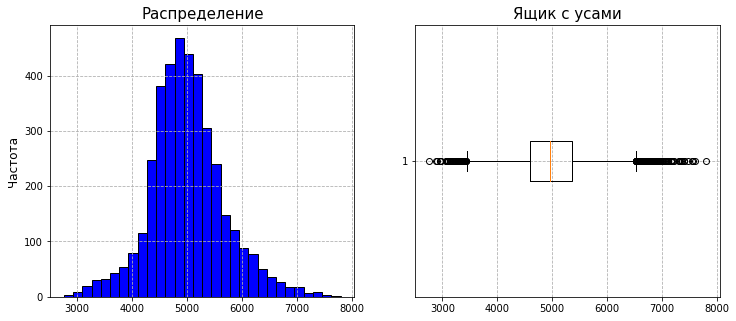

Описательная статистика:
count    3893.000000
mean     5007.282918
std       679.724898
min      2758.700000
25%      4592.000000
50%      4959.000000
75%      5363.000000
max      7799.400000
Name: выручка, dtype: float64


In [42]:
# числовые столбцы df_market_money (без id) и без выбросов
df_market_money_num = (df_market_money.query('0 < выручка < 106862.2')
                       [df_market_money.select_dtypes(include='number').columns]
                       .drop(['id'], axis=1))

for i in df_market_money_num:
    print(f'Столбец "{i}"')
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    plt.subplot(1,2,1)
    plt.hist(df_market_money_num[i], bins=30, ec='black', lw=1, color='blue')
    plt.title('Распределение', size=15)
    plt.ylabel('Частота', size=12)
    plt.grid(linestyle='dashed')
    plt.subplot(1,2,2)
    plt.boxplot(df_market_money_num[i], vert=False)
    plt.title('Ящик с усами', size=15)
    plt.grid(linestyle='dashed')
    plt.show()
    print('Описательная статистика:')
    print(df_market_money_num[i].describe())
    plt.show()

Столбец "период"
текущий_месяц           1300
предыдущий_месяц        1300
предпредыдущий_месяц    1300
Name: период, dtype: int64


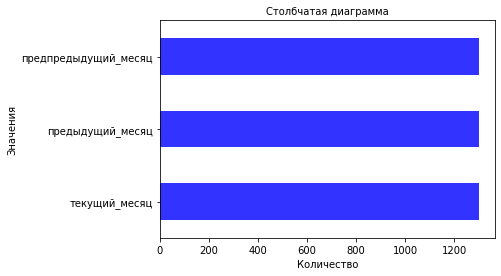

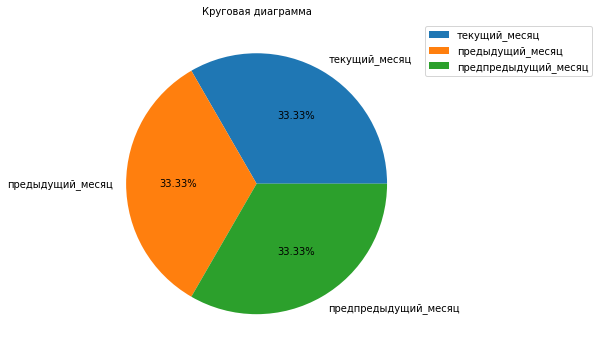

In [43]:
# категориальные столбцы df_market_money
df_market_money_cat = df_market_money[df_market_money.select_dtypes(exclude='number').columns]

for i in df_market_money_cat:
    print(f'Столбец "{i}"')
    print(df_market_money_cat[i].value_counts())
    df_market_money_cat[i].value_counts(ascending=True).plot(kind='barh', 
                             color='blue', 
                             alpha=0.8)
    plt.title('Столбчатая диаграмма', size=10)
    plt.xticks(rotation=0)
    plt.xlabel('Количество', size=10)
    plt.ylabel('Значения', size=10)
    plt.show()
    df_market_money_cat[i].value_counts().plot(kind='pie', 
                             legend=True, 
                             autopct='%.2f%%',
                             figsize=(8, 6))
    plt.legend(bbox_to_anchor=(1, 1), prop={'size': 10})
    plt.title('Круговая диаграмма', size=10)
    plt.ylabel(None)
    plt.show()

**Исследовательский анализ df_market_time**

In [44]:
# выведем на экран типы данных df_market_time
print(f'Типы данных "df_market_time":\n{df_market_time.dtypes}')

Типы данных "df_market_time":
id         int64
период    object
минут      int64
dtype: object


Столбец "минут"


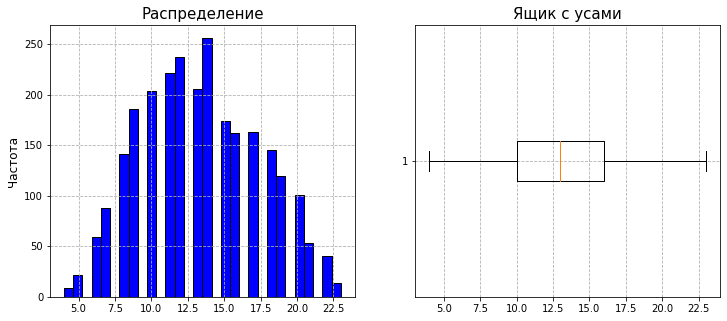

Описательная статистика:
count    2600.000000
mean       13.336154
std         4.080198
min         4.000000
25%        10.000000
50%        13.000000
75%        16.000000
max        23.000000
Name: минут, dtype: float64


In [45]:
# числовые столбцы df_market_time (без id)
df_market_time_num = df_market_time[df_market_time.select_dtypes(include='number').columns].drop(['id'], axis=1)

for i in df_market_time_num:
    print(f'Столбец "{i}"')
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    plt.subplot(1,2,1)
    plt.hist(df_market_time_num[i], bins=30, ec='black', lw=1, color='blue')
    plt.title('Распределение', size=15)
    plt.ylabel('Частота', size=12)
    plt.grid(linestyle='dashed')
    plt.subplot(1,2,2)
    plt.boxplot(df_market_time_num[i], vert=False)
    plt.title('Ящик с усами', size=15)
    plt.grid(linestyle='dashed')
    plt.show()
    print('Описательная статистика:')
    print(df_market_time_num[i].describe())
    plt.show()

Столбец "период"
текущий_месяц       1300
предыдущий_месяц    1300
Name: период, dtype: int64


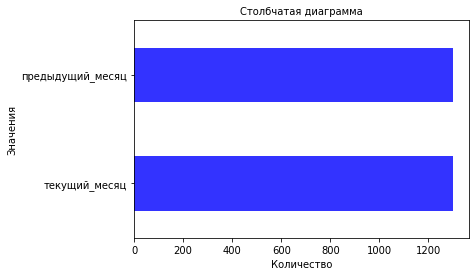

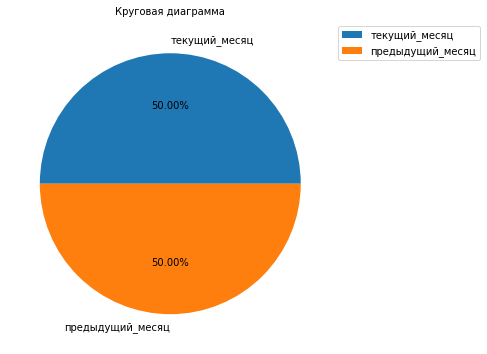

In [46]:
# категориальные столбцы df_market_time
df_market_time_cat = df_market_time[df_market_time.select_dtypes(exclude='number').columns]

for i in df_market_time_cat:
    print(f'Столбец "{i}"')
    print(df_market_time_cat[i].value_counts())
    df_market_time_cat[i].value_counts(ascending=True).plot(kind='barh', 
                             color='blue', 
                             alpha=0.8)
    plt.title('Столбчатая диаграмма', size=10)
    plt.xticks(rotation=0)
    plt.xlabel('Количество', size=10)
    plt.ylabel('Значения', size=10)
    plt.show()
    df_market_time_cat[i].value_counts().plot(kind='pie', 
                             legend=True, 
                             autopct='%.2f%%',
                             figsize=(8, 6))
    plt.legend(bbox_to_anchor=(1, 1), prop={'size': 10})
    plt.title('Круговая диаграмма', size=10)
    plt.ylabel(None)
    plt.show()

**Исследовательский анализ df_money**

In [47]:
# выведем на экран типы данных df_money
print(f'Типы данных "df_money":\n{df_money.dtypes}')

Типы данных "df_money":
id           int64
прибыль    float64
dtype: object


Столбец "прибыль"


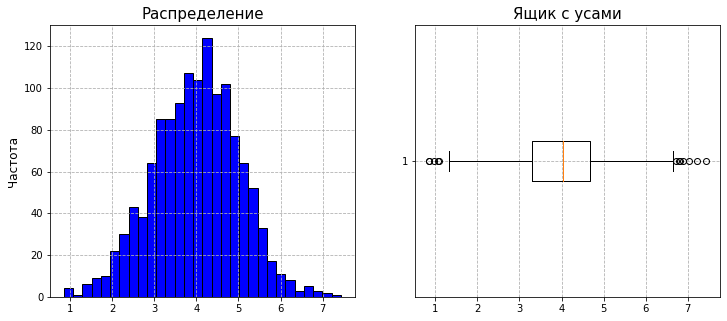

Описательная статистика:
count    1300.000000
mean        3.996631
std         1.013722
min         0.860000
25%         3.300000
50%         4.045000
75%         4.670000
max         7.430000
Name: прибыль, dtype: float64


In [48]:
# числовые столбцы df_money (без id)
df_money_num = df_money.drop(['id'], axis=1)

for i in df_money_num:
    print(f'Столбец "{i}"')
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    plt.subplot(1,2,1)
    plt.hist(df_money_num[i], bins=30, ec='black', lw=1, color='blue')
    plt.title('Распределение', size=15)
    plt.ylabel('Частота', size=12)
    plt.grid(linestyle='dashed')
    plt.subplot(1,2,2)
    plt.boxplot(df_money_num[i], vert=False)
    plt.title('Ящик с усами', size=15)
    plt.grid(linestyle='dashed')
    plt.show()
    print('Описательная статистика:')
    print(df_money_num[i].describe())
    plt.show()

**Отберём клиентов с покупательской активностью не менее трёх месяцев**

In [49]:
# найдем id пользователей, которые не совершали покупок в каком-либо периоде
no_active_id = df_market_money.loc[(df_market_money['выручка'] == 0)]['id'].unique()

# найдем пользователей, которые совершали покупки в каждом из последних трёх месяцев
active_users_three_months = df_market_money[df_market_money.id.isin(no_active_id) == False]

print('Всего записей в df_market_money:', len(df_market_money))
print('Строк с пользователями, которые совершали покупки в каждом из 3-х последних месяцев:', len(active_users_three_months))

Всего записей в df_market_money: 3900
Строк с пользователями, которые совершали покупки в каждом из 3-х последних месяцев: 3891


In [50]:
print('Число пользователей, которые совершали покупки в каждом из 3-х последних месяцев:', 
active_users_three_months['id'].nunique())

Число пользователей, которые совершали покупки в каждом из 3-х последних месяцев: 1297


Клиенты с постоянной покупательской активностью не менее трёх месяцев отобраны.

In [51]:
# определяем id пользователя с выбросом в выручке
id_to_delete = df_market_money[df_market_money['выручка'] == 106862.2]['id'].tolist()

# избавляемся от выброса
# удаляем данные о всех периодах для выбранного пользователя
df_market_money = df_market_money.query('id != @id_to_delete')
# удаляем данные о неактивных покупателях
df_market_money = df_market_money[df_market_money.id.isin(no_active_id) == False]
# проверяем
df_market_money['id'].nunique()

1296

В датафрейме **df_market_money** в столбце **выручка** был обнаружен выброс - **106862.2**. Его значение в среднем в 21 раз превышает остальные. Пользователя с подозрительным значением выручки исключили из датафрейма.

**Выводы**
- датасет **df_market_file**:
  - числовые признаки:
   - *маркет_актив_6 мес* - распределение нормальное, с незначительными пиками
   - *маркет_актив_тек_мес* - мультимодальное распределение, три пика: 3.0, 4.0, 5.0
   - *длительность* - распределение нормальное, есть пики на **200, 500, 780 и около 1000**
   - *акционные_покупки* - бимодальное распределение
   - *средний_просмотр_категорий_за_визит* - распределение нормальное
   - *неоплаченные_продукты_штук_квартал* - распределение нормальное
   - *ошибка_сервиса* - распределение нормальное
   - *страниц_за_визит* - распределение нормальное  
  - категориальные признаки:
   - *покупательская_активность* - 802 пользователя имеют Прежний уровень (61.69%); остальные - снизилась
   - *тип_сервиса* - 924 раза встречается **стандарт** (71.08%); остальные - премиум
   - *разрешить_сообщать* - 962 раза встречается **да** (74.00%); остальные наблюдения - нет
   - *популярная_категория* - топ-3 наблюдений:
        * *330 наблюдений - **Товары для детей** (25.38%) ;*
        * *251 наблюдений - **Домашний текстиль** (19.31%) ;*
        * *223 наблюдений - **Косметика и аксессуары** (17.15%) ;*
- датасет **df_market_money**:
    - числовые признаки:
     - *выручка* - распределение нормальное, большинство наблюдений расположены в промежутке **4500-5500**.
    - категориальные признаки:
     - *период* - наблюдения распределены поровну, по **1300**, между:
        * *предыдущий_месяц;*
        * *текущий_месяц;*
        * *предпредыдущий_месяц;*
- датасет **df_market_time**:
    - числовые признаки:
     - *минут* - распределение нормальное
    - категориальные признаки:
     - *период* - наблюдения распределены поровну, по **1300**, между:
        * *предыдущий_месяц;*
        * *текущий_месяц;*
- датасет **df_money**:
    - *прибыль* - распределение нормальное
    
- В датафрейме **df_market_money** в столбце **выручка** был обнаружен выброс - **106862.2**. Пользователя с подозрительным значением выручки исключили из датафрейма.
- В остальных датафреймах выбросы обнаружены не были.

## Объединение таблиц

In [52]:
# Значения столбца 'покупательская_активность' преобразуем: 
# 'Снизилась' преобразуем в 1
# 'Прежний уровень' преобразуем в 0

cat_value_one = 'Снизилась'
cat_value_two = 'Прежний уровень'

# перезапишем столбец 'покупательская_активность' с помощью функции to_binary_func
df_market_file['покупательская_активность'] = df_market_file['покупательская_активность'].apply(
    lambda value: 1 if value == cat_value_one else 0)

# проверяем
print(df_market_file['покупательская_активность'].value_counts())
df_market_file.head()

0    802
1    498
Name: покупательская_активность, dtype: int64


,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
0,215348,1,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,1,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,1,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,1,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,1,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


In [53]:
# выделим из df_market_money и df_market_time отдельные датарфеймы для каждого периода
df_market_money_cur_mes = (df_market_money
                           .query('период == "текущий_месяц"')
                           .drop(['период'], axis=1)
                           .rename(columns={'выручка': 'выручка_текущий_месяц'}))

df_market_money_pre_mes = (df_market_money
                           .query('период == "предыдущий_месяц"')
                           .drop(['период'], axis=1)
                           .rename(columns={'выручка': 'выручка_предыдущий_месяц'}))

df_market_money_prepre_mes = (df_market_money
                              .query('период == "предпредыдущий_месяц"')
                              .drop(['период'], axis=1)
                              .rename(columns={'выручка': 'выручка_предпредыдущий_месяц'}))

df_market_time_cur_mes = (df_market_time
                          .query('период == "текущий_месяц"')
                          .drop(['период'], axis=1)
                          .rename(columns={'минут': 'минут_текущий_месяц'}))

df_market_time_pre_mes = (df_market_time
                          .query('период == "предыдущий_месяц"')
                          .drop(['период'], axis=1)
                          .rename(columns={'минут': 'минут_предыдущий_месяц'}))

In [54]:
# объединяем датафреймы
df_merged_final = (df_market_file
                   .merge(df_market_money_cur_mes, on='id')
                   .merge(df_market_money_pre_mes, on='id')
                   .merge(df_market_money_prepre_mes, on='id')
                   .merge(df_market_time_cur_mes, on='id')
                   .merge(df_market_time_pre_mes, on='id')
                   .reset_index(drop=True))

# проверяем
print(df_merged_final.shape)
df_merged_final.head()

(1296, 18)


,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_текущий_месяц,выручка_предыдущий_месяц,выручка_предпредыдущий_месяц,минут_текущий_месяц,минут_предыдущий_месяц
0,215349,1,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,4971.6,5216.0,4472.0,10,12
1,215350,1,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5058.4,5457.5,4826.0,13,8
2,215351,1,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6610.4,6158.0,4793.0,13,11
3,215352,1,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5872.5,5807.5,4594.0,11,8
4,215353,1,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,5388.5,4738.5,5124.0,10,10


**Вывод:**

- Перед объединением таблиц преобразовали признак **покупательская_активность** в датафрейме **df_market_file** - категориальные значения **Снизилась** и **Прежний уровень** изменили на **1** и **0**;

- Объединили датафреймы **df_market_file**, **df_market_money** и **df_market_time** и сохранили в переменную **df_merged_final**;

- В итоговой таблице для каждого периода из **df_market_money** и **df_market_time** сделали отдельный столбец;

- Размер объединённого датафрейма:
    - 1296 строк
    - 18 столбцов


## Корреляционный анализ

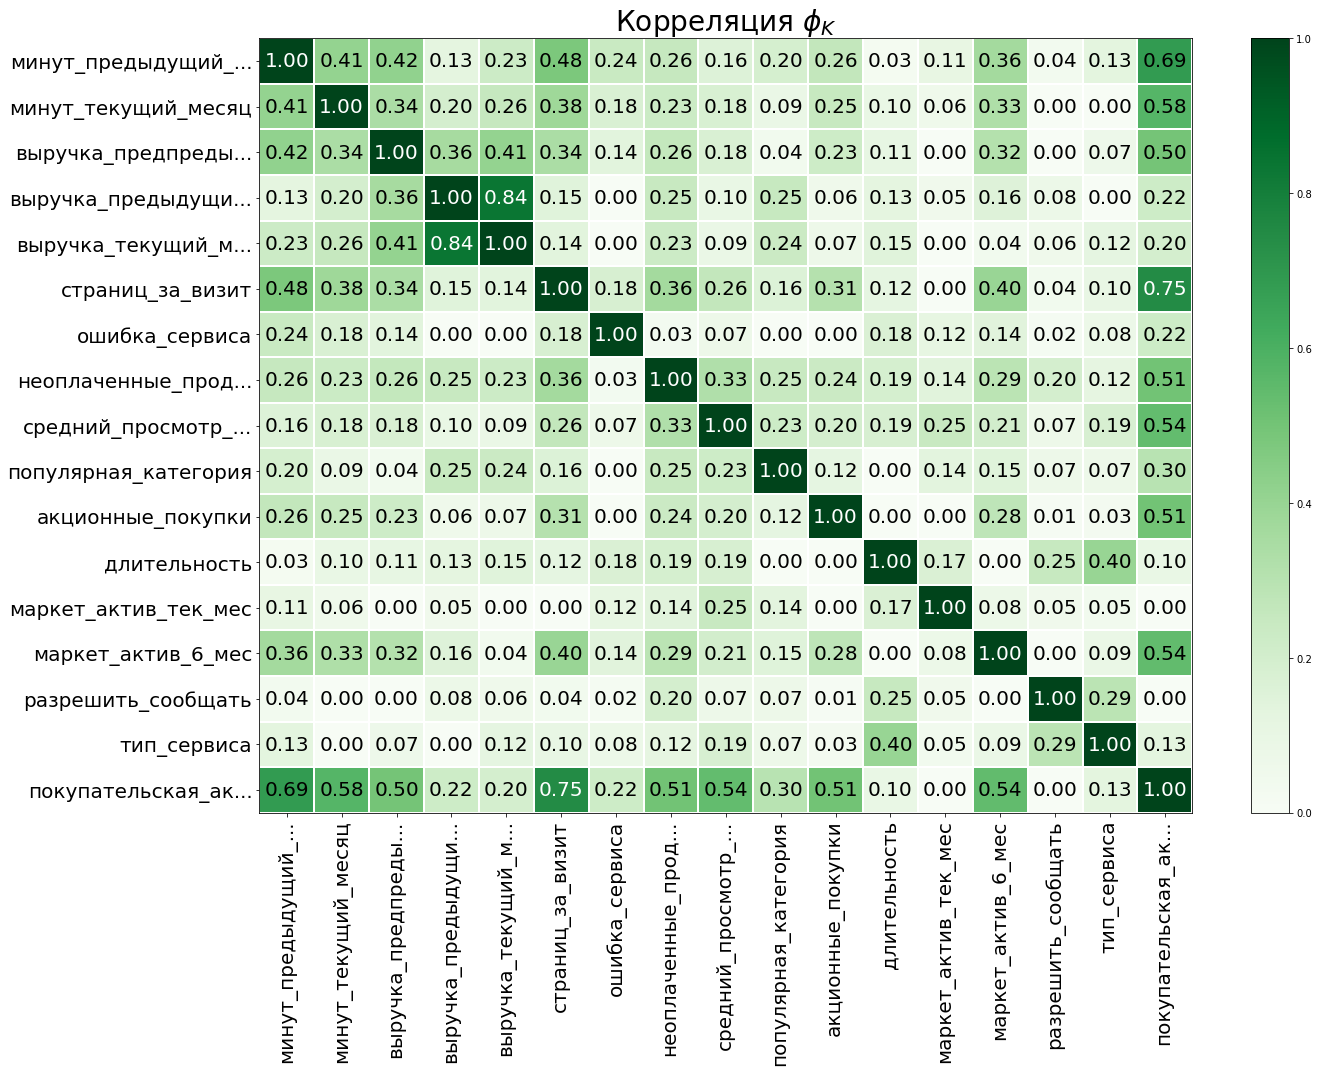

In [55]:
# строим матрицу корреляции
phik_overview = (
    df_merged_final
    .drop('id', axis=1)
    .phik_matrix(verbose=False))

# визуализируем матрицу и выводим на экран
plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    vmin=0, vmax=1, color_map='Greens',
    title=r'Корреляция $\phi_K$',
    fontsize_factor=2,
    figsize=(20, 15)
)

**Вывод**

Целевой признак: **покупательская_активность**. Остальные - **входные**.

**Корреляционные связи:**
- тип_сервиса: слабая связь с целевым признаком (0.13)
- разрешить_сообщать: связь отсутствует (0)
- маркет_актив_6 мес: заметная связь (0.54)
- маркет_актив_тек_мес: связь отсутствует (0)
- длительность: связь слабая, практически отсутствует(0.09)
- акционные_покупки: заметная связь (0.50)
- популярная_категория: умеренная связь (0.3)
- средний_просмотр_категорий_за_визит: заметная связь (0.54)
- неоплаченные_продукты_штук_квартал: заметная связь (0.50)
- ошибка_сервиса: связь слабая (0.22)
- страниц_за_визит: высокая связь (0.75)
- выручка_текущий_месяц: связь слабая (0.20)
- выручка_предыдущий_месяц: связь слабая (0.16)
- выручка_предпредыдущий_месяц:	заметная связь (0.48)
- минут_текущий_месяц:	заметная связь (0.58)
- минут_предыдущий_месяц:	заметная связь, близка к высокой (0.68)

Мультиколлинеарность отсутствует.

## Использование пайплайнов

In [56]:
# проверяем целевой признак на дисбаланс классов
print('Соотношение классов признака "покупательская_активность" (в %):')
print(round(df_merged_final.покупательская_активность.value_counts(normalize=True), 2))

Соотношение классов признака "покупательская_активность" (в %):
0    0.62
1    0.38
Name: покупательская_активность, dtype: float64


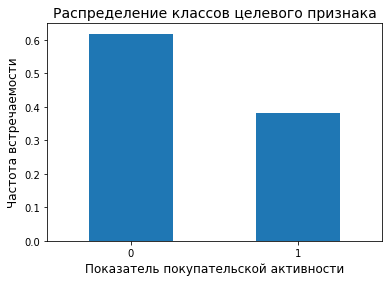

In [57]:
# отобразим на графике
df_merged_final.покупательская_активность.value_counts(normalize=True).plot(kind='bar')
plt.title('Распределение классов целевого признака', size=14)
plt.xlabel('Показатель покупательской активности', size=12)
plt.ylabel('Частота встречаемости', size=12)
plt.xticks(rotation=0);

Соотношение классов в целевом признаке непропорционально:
- **62%** (прежний уровень, класс **0**)
- **38%** (снизилась, класс **1**).  
Чтобы сохранить пропорцию классов в тренировочной и тестовой выборках, используем стратификацию.

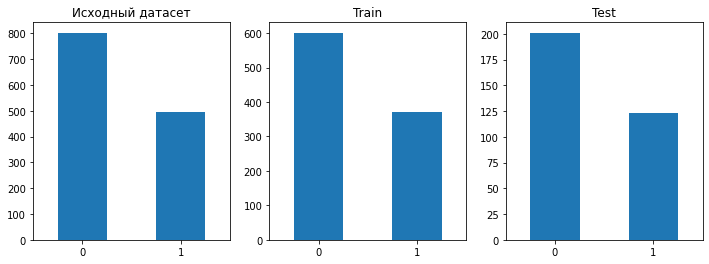

In [58]:
RANDOM_STATE = 42
TEST_SIZE = 0.25

X = df_merged_final.drop(columns=['покупательская_активность', 'id'])
y = df_merged_final['покупательская_активность']

# разбиваем данные на выборки с учётом стратификации по целевому признаку
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE, 
    test_size=TEST_SIZE, 
    stratify=y
) 

# визуализируем баланс целевого признака в выборках
fig, ax = plt.subplots(1,3, figsize=(12,4))
y.value_counts().plot(kind='bar', ax=ax[0], rot=0)
ax[0].set_title("Исходный датасет")
y_train.value_counts().plot(kind='bar', ax=ax[1], rot=0)
ax[1].set_title("Train")
y_test.value_counts().plot(kind='bar', ax=ax[2], rot=0)
ax[2].set_title("Test")
plt.show()

Используем модели:

- DecisionTreeClassifier() с гиперпараметрами:
    * max_depth от **2 до 4** включительно
    * max_features от **2 до 4** включительно


- KNeighborsClassifier() с гиперпараметром:
    * n_neighbors от **2 до 4** включительно


- LogisticRegression():
    * с **solver='liblinear'** и *лассо-регуляризацией* с гиперпараметром:
    * **С** от **1 до 4** включительно


- SVC():
    * с линейным ядром **kernel='linear'** с гиперпараметром:
    * перебор «силы» модели для ядра: от **1 до 9** включительно


После выбора лучшей модели рассчитаем метрику **ROC-AUC** на тренировочной и тестовой выборках.  
Эту метрику выбрали, так как она лучше всего подойдёт для задачи бинарной классификации с несбалансированным целевым признаком.

In [59]:
# признаки для кодирования OneHotEncoder
ohe_columns = ['популярная_категория']

# признаки для кодирования OrdinalEncoder
ord_columns = ['тип_сервиса', 'разрешить_сообщать']

# признаки для масштабирования/стандартизации
num_columns = ['маркет_актив_6_мес', 
               'маркет_актив_тек_мес', 
               'длительность', 
               'акционные_покупки', 
               'средний_просмотр_категорий_за_визит', 
               'неоплаченные_продукты_штук_квартал', 
               'ошибка_сервиса', 
               'страниц_за_визит', 
               'выручка_текущий_месяц', 
               'выручка_предыдущий_месяц', 
               'выручка_предпредыдущий_месяц', 
               'минут_текущий_месяц', 
               'минут_предыдущий_месяц']

# добавляем OHE-кодирование в пайплайн
ohe_pipe = Pipeline([('ohe', OneHotEncoder(drop='first', handle_unknown='error', sparse_output=False))])

# добавляем Ordinal-кодирование в пайплайн
ord_pipe = Pipeline(
    [('ord', OrdinalEncoder(
    categories=[
        ['стандарт', 'премиум'], 
        ['да', 'нет']
    ], 
    handle_unknown='use_encoded_value', 
    unknown_value=np.nan))
                    ]
                   )

# создаём общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', MinMaxScaler(), num_columns)
    ], 
    remainder='passthrough'
)

# создаём итоговый пайплайн для обучения модели
pipe_final = Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
    ]
)

param_grid = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 5),
        'models__max_features': range(2, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler()]  
    },
    
    # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler()]   
    },
        # словарь для модели SVC() 
    {
        'models': [SVC(random_state=RANDOM_STATE)],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  

    },

    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='liblinear', 
            penalty='l1'
        )],
        'models__C': range(1, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler()]  
    },
    
]

# выберем лучшую модель и параметры с помощью RandomizedSearchCV()
# количество комбинаций гиперпараметров = 5
randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    n_iter=5,
    random_state=RANDOM_STATE,
    n_jobs=-1
)
# обучаем лучшую модель на тренировочных данных
randomized_search.fit(X_train, y_train)

# выводим на экран лучшую модель, её параметры и метрику ROC-AUC на тренировочной выборке
print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print(f'Параметры лучшей модели:\n{randomized_search.best_params_}')
print ('Метрика лучшей модели по кросс-валидации:', round(randomized_search.best_score_, 3))

probs=randomized_search.predict_proba(X_test)[:,1]
# проверяем работу модели на тестовой выборке
y_test_pred = randomized_search.predict(X_test)
print(f'Метрика ROC-AUC на тестовой выборке: {round(roc_auc_score(y_test, probs), 3)}')

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['популярная_категория']),
                                                 ('ord',
                                                  Pipeline(steps=[('ord',
                                                                   OrdinalEncoder(categories=[['стандарт',
                                                                                               'премиум'],
                                                                                              ['да',
                    

**Вывод**

Построили пайплайн и выбрали лучшую комбинацию модели и гиперпараметров с использованием *четырёх* моделей:
* **DecisionTreeClassifier()**
* **KNeighborsClassifier()**
* **LogisticRegression()**
* **SVC()**

Лучшая модель: 
* **LogisticRegression**
* C параметром **C=1** и скалером **MinMaxScaler()**

Метрика ROC-AUC лучшей модели по кросс-валидации: **0.902**

Метрика ROC-AUC лучшей модели на тестовой выборке: **0.914**

## Анализ важности признаков

In [60]:
# кодируем категориальные признаки с помощью OneHotEncoder()
ohe_encoder = OneHotEncoder(sparse_output=False, drop='first')
X_train_ohe = ohe_encoder.fit_transform(X_train[ohe_columns])
X_test_ohe = ohe_encoder.transform(X_test[ohe_columns])
ohe_encoder_col_names = ohe_encoder.get_feature_names_out()

# кодируем категориальные признаки с помощью OrdinalEncoder()
ord_encoder = OrdinalEncoder()
X_train_ord = ord_encoder.fit_transform(X_train[ord_columns])
X_test_ord = ord_encoder.transform(X_test[ord_columns])
ord_encoder_col_names = ord_encoder.get_feature_names_out()

# масштабируем количественные признаки с помощью StandardScaler()
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_columns])
X_test_scaled = scaler.transform(X_test[num_columns])

# создаём тренировочный и тестовый датафреймы из закодированных и отмасштабированных данных
X_train_ohe = pd.DataFrame(X_train_ohe, columns=ohe_encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=ohe_encoder_col_names)

X_train_ord = pd.DataFrame(X_train_ord, columns=ord_encoder_col_names)
X_test_ord = pd.DataFrame(X_test_ord, columns=ord_encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_columns)

# объединяем все преобразованные данные в тренировочный и тестовый датафреймы
X_train_first = pd.concat([X_train_ohe, X_train_ord], axis=1)
X_train_final = pd.concat([X_train_first, X_train_scaled], axis=1)

X_test_first = pd.concat([X_test_ohe, X_test_ord], axis=1)
X_test_final = pd.concat([X_test_first, X_test_scaled], axis=1)

In [61]:
# объявляем классификатор и обучим модель
clf_best = LogisticRegression( C=1, random_state=42)
clf_best.fit(X_train_final, y_train)
y_pred = clf_best.predict(X_test_final)

# в отдельную переменную сохраняем предсказания принадлежности к классам для тестовых данных
clf_best_probas = clf_best.predict_proba(X_test_final)[:,1]

# считаем метрику ROC-AUC для тренировочных и тестовых данных
print('Метрики Best Model:')
roc_auc_cv = cross_val_score(clf_best, X_train_final, y_train, scoring='roc_auc').mean()
print(f'ROC-AUC на тренировочной выборке: {round(roc_auc_cv, 3)}')
print(f'ROC-AUC на тестовой выборке: {round(roc_auc_score(y_test, y_pred), 3)}')

# оценка качества модели по метрике accuracy
clf_best_acc = accuracy_score(y_test, y_pred)
print('Accuracy:', round(clf_best_acc, 3))

# выводим F1-меру
clf_best_f1 = f1_score(y_test, y_pred, pos_label=1)
print('F1-score:', round(clf_best_f1, 3))

Метрики Best Model:
ROC-AUC на тренировочной выборке: 0.896
ROC-AUC на тестовой выборке: 0.888
Accuracy: 0.904
F1-score: 0.867


In [62]:
# создание и обучение модели DummyClassifier 
dummy_model = DummyClassifier(random_state=RANDOM_STATE)
dummy_model.fit(X_train_final, y_train)

# предсказание на тестовых данных
dummy_model_preds = dummy_model.predict(X_test_final)

# считаем метрику ROC-AUC для тренировочных и тестовых данных
print('Метрики Dummy Model:')
d_roc_auc_cv = cross_val_score(dummy_model, X_train_final, y_train, scoring='roc_auc').mean()
print(f'ROC-AUC на тренировочной выборке: {round(d_roc_auc_cv, 3)}')

# оценка качества модели по метрике ROC-AUC
dummy_roc = roc_auc_score(y_test, dummy_model_preds)
print('ROC-AUC на тестовой выборке:', round(dummy_roc,2))

# оценка качества модели по метрике accuracy
dummy_acc = accuracy_score(y_test, dummy_model_preds)
print('Accuracy:', round(dummy_acc, 2))

# выводим F1-меру
dummy_f1 = f1_score(y_test, dummy_model_preds, pos_label=1)
print('F1-score:', round(dummy_f1,2))

Метрики Dummy Model:
ROC-AUC на тренировочной выборке: 0.5
ROC-AUC на тестовой выборке: 0.5
Accuracy: 0.62
F1-score: 0.0


Результаты модели **LogisticRegression** лучше **Dummy Model**. 

**Метрики лучшей модели:**
* *ROC-AUC на тренировочной выборке -* ***0.902***
* *ROC-AUC на тестовой выборке -* ***0.87***
* *F1-мера -* ***0.845***

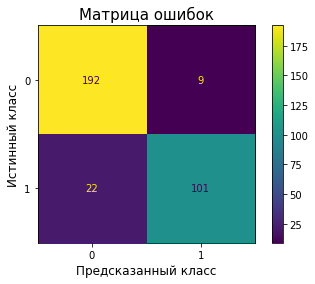

Отчет о классификации:              precision    recall  f1-score   support

           0       0.90      0.96      0.93       201
           1       0.92      0.82      0.87       123

    accuracy                           0.90       324
   macro avg       0.91      0.89      0.90       324
weighted avg       0.91      0.90      0.90       324



In [63]:
# построим матрицу ошибок для тестовых данных
ConfusionMatrixDisplay.from_estimator(clf_best, X_test_final, y_test)
plt.title('Матрица ошибок', size=15)
plt.xlabel('Предсказанный класс', size=12)
plt.ylabel('Истинный класс', size=12)
plt.show()

# выводим отчет о классификации
print(f'Отчет о классификации:{classification_report(y_test, y_pred)}')

Модель верно предсказала:
* ***класс 0*** *(прежний уровень)* - **191** раз
* ***класс 1*** *(снизилась)* - **98** раз
* *ошибка False Negative* - **26** раза
* *ошибка False Positive* - **10** раза 

В **26** случаях для покупателей со сниженной покупательской активностью (**класс 1**) предсказала её сохранение на прежнем уровне (**класс 0**). 

In [64]:
# попробуем поменять пороги
thresholds = [0.1, 0.2, 0.3, 0.4, 0.55]
columns = []
precision = []
recall = []
accuracy = []
roc_auc = []
f1_sc = []
false_positive = []
false_negative = []
true_positive = []
true_negative = []

# наполняем списки значениями
for i in thresholds:
    columns.append('y_pred_'+str(i))
    preds = np.where(clf_best.predict_proba(X_test_final)[:,1] > i, 1, 0)
    precision.append(round(precision_score(y_test, preds), 2))
    recall.append(round(recall_score(y_test, preds), 2))
    accuracy.append(round(accuracy_score(y_test, preds), 2))
    roc_auc.append(round(roc_auc_score(y_test, preds), 3))
    f1_sc.append(round(f1_score(y_test, preds), 3))   
    false_positive.append(confusion_matrix(y_test, preds)[0, 1])
    false_negative.append(confusion_matrix(y_test, preds)[1, 0])
    true_positive.append(confusion_matrix(y_test, preds)[1, 1])
    true_negative.append(confusion_matrix(y_test, preds)[0, 0])

# формируем датафрем из получившихся списков    
frame = pd.DataFrame(zip(columns, 
                         precision, 
                         recall,
                         accuracy, 
                         roc_auc, 
                         f1_sc,
                         false_positive, 
                         false_negative, 
                         true_positive, 
                         true_negative), 
                     columns = ['Порог', 
                                'precision', 
                                'recall', 
                                'accuracy', 
                                'roc_auc', 
                                'f1_score',
                                'false_positive', 
                                'false_negative', 
                                'true_positive ', 
                                'true_negative']) 

# выводим датафрем с перебором порогов на экран
frame

,Порог,precision,recall,accuracy,roc_auc,f1_score,false_positive,false_negative,true_positive,true_negative
0,y_pred_0.1,0.52,0.93,0.65,0.702,0.667,105,9,114,96
1,y_pred_0.2,0.66,0.88,0.78,0.802,0.755,55,15,108,146
2,y_pred_0.3,0.75,0.86,0.84,0.844,0.803,35,17,106,166
3,y_pred_0.4,0.86,0.83,0.88,0.872,0.843,17,21,102,184
4,y_pred_0.55,0.95,0.81,0.91,0.894,0.877,5,23,100,196


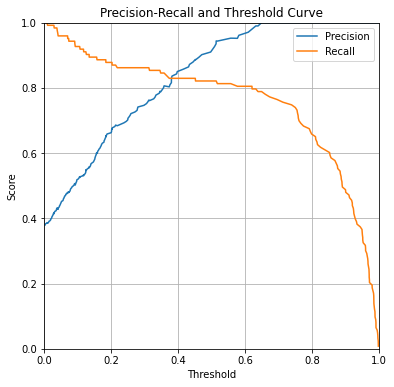

In [65]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, thresholds = precision_recall_curve(y_test, clf_best_probas)

plt.figure(figsize=(6, 6))
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.title('Precision-Recall and Threshold Curve')
plt.grid(True)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

Cо снижением порога снижаются метрики качества модели.

При False Negative=9 и при пороге 0.1, False Positive = 106. То есть, в 106 случаях модель предскажет снижение покупательской активности для тех покупателей, у которых эта активность не изменится.
Чтобы заинтересовать покупателей, у которых предсказана сниженная активность, можно рассылать промокоды/купоны на скидки. 
Но можно упустить других покупателей.

При пороге 0.2 False Negative=15 и False Positive=57. 
При пороге 0.3 False Negative=17 и False Positive=38.

Поэтому по результатам перебора порогов думается, что лучше оставить порог без изменений.

**Посмотрим на разделяющую границу между классами**

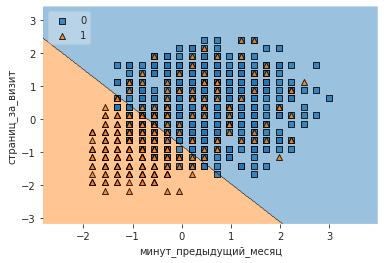

In [66]:
# обозначаем признаки для обучения
columns = ['страниц_за_визит', 'минут_предыдущий_месяц']

# передаём признаки в тренировочную выборку и стандартизируем
X_new_train = X_train_final[columns]
X_new_scalled = scaler.fit_transform(X_new_train)

# обучим модель
clf_best_new = LogisticRegression(C=1, random_state=42)
clf_best_new.fit(X_new_scalled, y_train)

# строим разделяющую границу между классами
sns.set_style(style='white')
plot_decision_regions(X_new_scalled, y_train.to_numpy(), clf=clf_best_new, legend=2)
plt.xlabel(columns[1])
plt.ylabel(columns[0])
plt.show()

**Признаки, которые вносят наибольший вклад в модель**

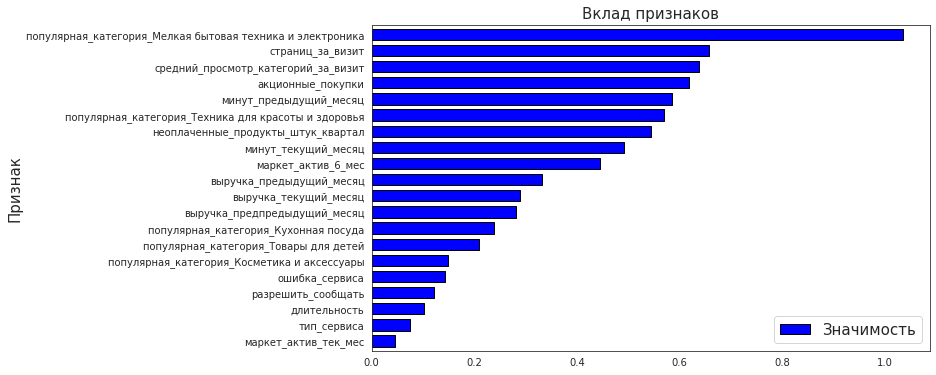

In [67]:
coeffs = clf_best.coef_[0]
feature_importance = pd.DataFrame({'Признак': X_train_final.columns, 'Значимость': np.abs(coeffs)})
feature_importance = feature_importance.sort_values(by='Значимость', ascending=True)
feature_importance.plot(x='Признак', 
                        y='Значимость', 
                        kind='barh', 
                        figsize=(10, 6), 
                        ec='black', 
                        lw=1, color='blue', 
                        width=0.7)
plt.legend(prop={'size': 15})
plt.ylabel('Признак', size=15)
plt.title('Вклад признаков', size=15)
plt.show()

Самые значимые признаки:
- популярная_категория_Мелкая бытовая техника и электроника
- средний_просмотр_категорий_за_визит
- страниц_за_визит
- популярная_категория_Техника для красоты и здоровья
- акционные_покупки

Самые незначительные признаки:
- длительность
- ошибка_сервиса
- разрешить_сообщать
- популярная_категория_Косметика и аксессуары
- маркет_актив_тек_мес

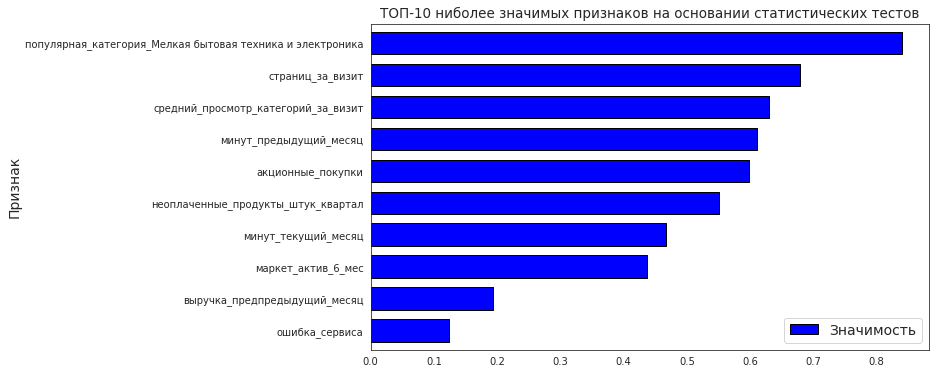

In [68]:
# выбираем селектор с нужными параметрами
# рассмотрим 10 признаков
selector = SelectKBest(f_classif, k=10)

# создаём новый набор данных (10 наиболее важных признаков из выборки)
X_new = selector.fit_transform(X_train_final, y_train)

# формируем выборки с лучшими признаками
features_names = X_train_final.columns[selector.get_support(indices=True)]
X_train_new = X_train_final[list(features_names)]
X_test_new = X_test_final[list(features_names)]

# обучаем модель
clf_best_fit_new = LogisticRegression(C=1, random_state=42)
clf_best_fit_new.fit(X_train_new, y_train)

# отложим значения коэффициентов на графике
coefficients = clf_best_fit_new.coef_[0]
feature_importance = pd.DataFrame({'Признак': features_names, 'Значимость': np.abs(coefficients)})
feature_importance = feature_importance.sort_values(by='Значимость', ascending=True)
feature_importance.plot(x='Признак', 
                        y='Значимость', 
                        kind='barh', 
                        figsize=(10, 6), 
                        color='blue', 
                        ec='black', 
                        lw=1, 
                        width=0.7)
plt.legend(prop={'size': 14})
plt.ylabel('Признак', size=14)
plt.title('ТОП-10 ниболее значимых признаков на основании статистических тестов', size=13.5)
plt.show()

Статистические тесты дали следующий результат:
- страниц_за_визит
- популярная_категория_Мелкая бытовая техника и электроника
- минут_предыдущий_месяц
- акционные_покупки
- средний_просмотр_категорий_за_визит

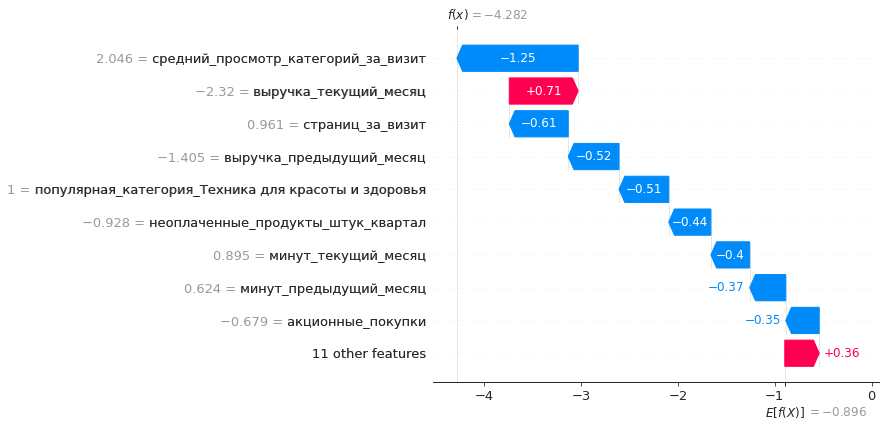

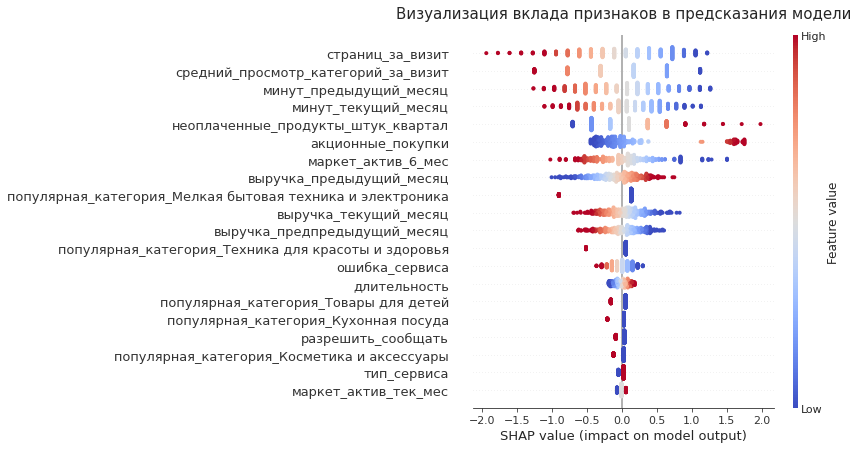

In [69]:
# строим график общей значимости признаков для лучшей модели
explainer = shap.Explainer(clf_best, X_train_final)
shap_values = explainer(X_test_final)
shap.plots.waterfall(shap_values[0])

# визуализируем вклад признаков на диаграмме
shap.summary_plot(shap_values, X_test_final, show=False, plot_size=[12, 6], cmap='coolwarm')
plt.title('Визуализация вклада признаков в предсказания модели', size=15, y=1.03)
plt.show()

Исходя из анализа SHAP-значений, наиболее значимые признаки:

- страниц_за_визит
- неоплаченные_продукты_штук_квартал
- минут_предыдущий_месяц
- средний_просмотр_категорий_за_визит
- минут_текущий_месяц

**Вывод:**
- Признаки, мало значимые для модели:
   - тип_сервиса
   - популярная_категория_Товары для детей
   - разрешить_сообщать
   - маркет_актив_тек_мес
   - популярная_категория_Косметика и аксессуары
- Признаки, сильнее всего влияюшие на целевой признак:
    - страниц_за_визит
    - неоплаченные_продукты_штук_квартал
    - минут_предыдущий_месяц
    - средний_просмотр_категорий_за_визит
    - минут_текущий_месяц
- При моделировании и принятии бизнес-решений следует учесть:
    - на покупателей оказывает ощутимое влияние наличие акций, возможно объём таких предложений стоит увеличить, так как товары со скидкой всегда привлекают внимание.
    - чем дольше покупатель находится на сайте и чем больше страниц просматривает, тем больше вероятность, что он совершит покупку.

## Сегментация покупателей

In [70]:
# принадлежности кклассам для тренировочной выборки
clf_best_probas_train = clf_best.predict_proba(X_train_final)[:,1]

# предсказания для тренировочной выборки
X_pred = clf_best.predict(X_train_final)

# объединяем выборки
total_train = pd.concat([X_train, y_train], axis=1)
total_test = pd.concat([X_test, y_test], axis=1)

# добавялем столбцы с прогнозами
total_train['probas'] = clf_best_probas_train.tolist()
total_train['класс_прогноз'] = X_pred.tolist()
total_test['probas'] = clf_best_probas.tolist()
total_test['класс_прогноз'] = y_pred.tolist()

# объединяем и добавялем столбец 'id'
final_df = pd.concat([total_train, total_test])
final_df = pd.merge(final_df, df_merged_final['id'], left_index=True, right_index=True)

# перезапишем столбец 'покупательская_активность' 
final_df['покупательская_активность'] = final_df['покупательская_активность'].apply(lambda value: 1 if value == cat_value_one else 0)

cat_value_one = 'Снизится'
cat_value_two = 'Не изменится'
final_df['класс_прогноз'] = final_df['класс_прогноз'].apply(lambda value: 1 if value == cat_value_one else 0)

# переименовываем для удобства столбец 'класс_прогноз'
final_df = final_df.rename(columns={'класс_прогноз': 'прогноз_покуп_актив'})

# добавялем данные о прибыльности
final_df = final_df.merge(df_money, on='id')

**Переходим к выбору сегмента для анализа**

**Выбранный сегмент:** 
* покупатели с высокой прибыльностью **(>5)** 
* и высокой вероятностью снижения покупательской активности **(>0.7)**

In [71]:
# добавим новый столбец с вероятностью снижения покупательской активности 
# исходя из выбранного порога в 0.7
def segment(data):
    if data > 0.7:
            return 'Высокая вероятность снижения'
    else:
            return 'Низкая вероятность снижения'
    
final_df['прогноз_покуп_активности'] = final_df['probas'].apply(segment)

# сохраянем выбранный сегмент в отдельную переменную
selected_segment = final_df[(final_df['прибыль'] > 5) & (final_df['probas'] > 0.7)]

# также в отедльную переменную сохраним покупателей с низкой вероятностью снижения активности
selected_segment_good = final_df[(final_df['прибыль'] > 5) & (final_df['probas'] < 0.7)]

print('Количество покупателей выбранного сегмента:', selected_segment['id'].count())

selected_segment.sort_values(by='прибыль', ascending=False)[['id', 
                                                             'прибыль',
                                                             'probas',
                                                             'прогноз_покуп_активности', 
                                                             'страниц_за_визит', 
                                                             'акционные_покупки', 
                                                             'популярная_категория', 
                                                             'тип_сервиса',
                                                             'разрешить_сообщать']]

Количество покупателей выбранного сегмента: 54


,id,прибыль,probas,прогноз_покуп_активности,страниц_за_визит,акционные_покупки,популярная_категория,тип_сервиса,разрешить_сообщать
316,215401,7.43,0.913544,Высокая вероятность снижения,4,0.30,Косметика и аксессуары,премиум,да
1105,215563,6.88,0.816752,Высокая вероятность снижения,7,0.35,Косметика и аксессуары,премиум,да
902,215400,6.73,0.991151,Высокая вероятность снижения,2,0.94,Товары для детей,стандарт,нет
503,215561,6.59,0.987027,Высокая вероятность снижения,3,0.28,Косметика и аксессуары,стандарт,нет
1202,215505,6.55,0.924706,Высокая вероятность снижения,3,0.31,Товары для детей,стандарт,да
848,215368,6.27,0.889988,Высокая вероятность снижения,1,0.24,Техника для красоты и здоровья,премиум,да
120,215494,6.12,0.923211,Высокая вероятность снижения,3,0.23,Косметика и аксессуары,стандарт,нет
490,215613,5.99,0.953187,Высокая вероятность снижения,4,0.93,Техника для красоты и здоровья,стандарт,да
149,215456,5.83,0.927096,Высокая вероятность снижения,5,0.23,Косметика и аксессуары,стандарт,да
539,215555,5.79,0.981914,Высокая вероятность снижения,2,0.89,Товары для детей,стандарт,нет


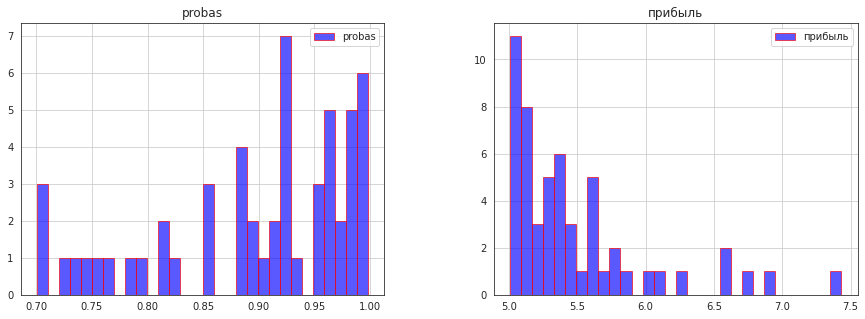

In [72]:
# Изучим распределения вероятности снижения покупательской активности и прибыльности для выбранного сегмента
selected_segment[['probas', 'прибыль']].hist(bins=30, ec='red', lw=1, alpha=0.65, legend=True, figsize=(15, 5), color='b');

У многих покупателей выбранного сегмента вероятность принадлежности к классу 1 (снижение) даже выше 0.9, что говорит об очень высокой вероятности снижения их покупательской активности вплоть до её сведения к нулю.

Максимальный показатель прибыльности составляет 7.43 для всех покупателей заказчика.

Снижение покупательской активности (количество покупателей)
Низкая вероятность: 152
Высокая вероятность: 54


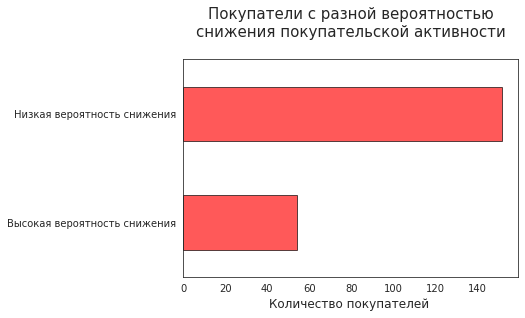

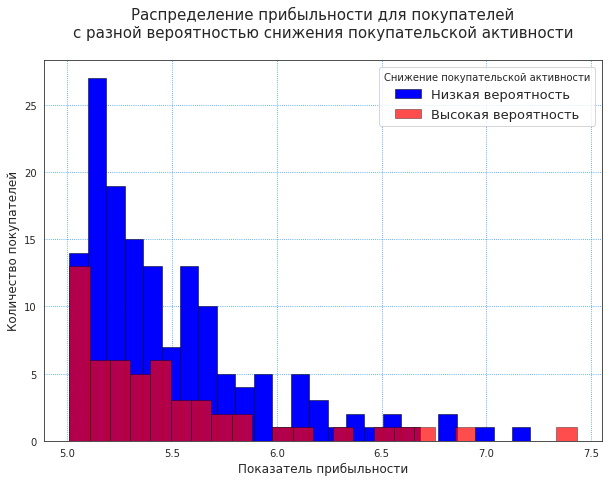

In [73]:
# количество покупателей с разными вероятностями снижения активности
print('Снижение покупательской активности (количество покупателей)')
print('Низкая вероятность:', selected_segment_good['id'].count())
print('Высокая вероятность:', selected_segment['id'].count())

# визуализируем на графике
(final_df[(final_df['прибыль'] > 5)]['прогноз_покуп_активности']
 .value_counts(ascending=True)
 .plot(kind='barh', color='r', ec='black', lw=1, alpha=0.65))
plt.title('Покупатели с разной вероятностью\nснижения покупательской активности\n', size=15)
plt.xlabel('Количество покупателей ', size=12)
plt.show()

# построим двойную гистограмму для прибыльности покупателей
# с низкой и высокой вероятностью снижения покупательской активности
ax = selected_segment_good['прибыль'].plot(
    kind='hist',
    histtype='bar',
    bins=25,
    linewidth=5,
    label='raw',
    figsize=(10,7),
    ec='black',
    lw=0.5,
    alpha=1,
    facecolor='blue')

selected_segment['прибыль'].plot(
    kind='hist',
    histtype='bar',
    bins=25,
    linewidth=5,
    ax=ax,
    grid=False,
    figsize=(10, 7),
    ec='black',
    lw=0.5,
    alpha=0.7,
    facecolor='red')
plt.grid(linestyle='dotted', color='dodgerblue')
plt.title('Распределение прибыльности для покупателей\nс разной вероятностью снижения покупательской активности\n', size=15)
plt.xlabel('Показатель прибыльности', size=12)
plt.ylabel('Количество покупателей', size=12)
plt.legend(['Низкая вероятность',
            'Высокая вероятность'], prop={'size': 13}, title='Снижение покупательской активности')
plt.show()

Прибыльность покупателей с высокой вероятностью снижения покупательской активности сопоставима с покупателями с низкой вероятностью снижения активности.
Покупатели с высокой вероятностью снижения покупательской активности с точки зрения прибыльности так же важны как и остальные. Мероприятия по их удержанию и повышению покупательской активности будут более чем оправданы.

In [74]:
# посмотрим на отношение покупателей выбранного сегмента к рассылкам
print('Разрешение на рекламные рассылки в выбранном сегменте:')
print(selected_segment['разрешить_сообщать'].value_counts())

Разрешение на рекламные рассылки в выбранном сегменте:
да     38
нет    16
Name: разрешить_сообщать, dtype: int64


Почти 69% покупателей сегмента лояльно относятся к рассылкам. 

Популярные категории в выбранном сегменте:
Товары для детей                        15
Косметика и аксессуары                  15
Домашний текстиль                        8
Кухонная посуда                          8
Техника для красоты и здоровья           6
Мелкая бытовая техника и электроника     2
Name: популярная_категория, dtype: int64
Типы сервиса в выбранном сегменте:
стандарт    31
премиум     23
Name: тип_сервиса, dtype: int64


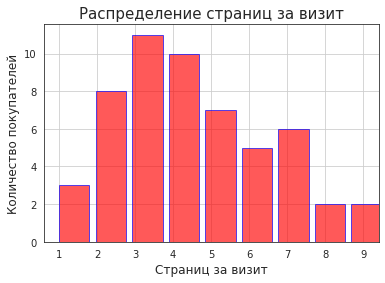

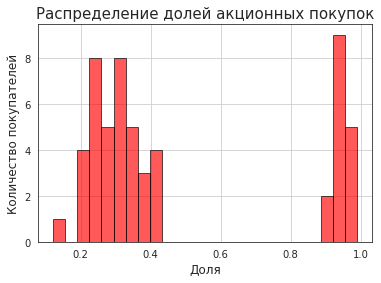

In [75]:
# изуучим в выбранном сегменте популярные категории и типы сервиса
print('Популярные категории в выбранном сегменте:')
print(selected_segment['популярная_категория'].value_counts())
print('Типы сервиса в выбранном сегменте:')
print(selected_segment['тип_сервиса'].value_counts())

# изуучим в выбранном сегменте распределение страниц за визит
selected_segment['страниц_за_визит'].hist(bins=25, color='r', ec='blue', lw=1, alpha=0.65, width=0.8)
plt.title('Распределение страниц за визит', size=15)
plt.xlabel('Страниц за визит', size=12)
plt.ylabel('Количество покупателей', size=12)
plt.show()
# изуучим в выбранном сегменте распределение долей акционных покупок
selected_segment['акционные_покупки'].hist(bins=25, color='r', ec='black', lw=1, alpha=0.65)
plt.title('Распределение долей акционных покупок', size=15)
plt.xlabel('Доля', size=12)
plt.ylabel('Количество покупателей', size=12)
plt.show()

Количество покупателей с долей акционных покупок выше 80%: 16
Их отношение к рассылкам:
да     11
нет     5
Name: разрешить_сообщать, dtype: int64
Самые популярные категории покупателей с долей акционных покупок выше 80%:
Товары для детей                        4
Кухонная посуда                         4
Домашний текстиль                       3
Техника для красоты и здоровья          2
Косметика и аксессуары                  2
Мелкая бытовая техника и электроника    1
Name: популярная_категория, dtype: int64
Типы сервиса покупателей с долей акционных покупок выше 80%:
стандарт    13
премиум      3
Name: тип_сервиса, dtype: int64


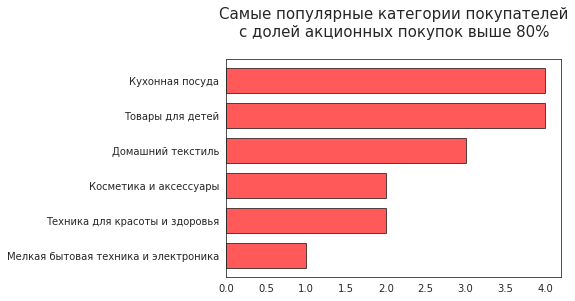

In [76]:
# изучим покупателей, склонных совершать в основном акционные покупки
print('Количество покупателей с долей акционных покупок выше 80%:', 
      selected_segment[selected_segment['акционные_покупки'] > 0.8]['id'].count())

print('Их отношение к рассылкам:')
print(selected_segment[selected_segment['акционные_покупки'] > 0.8]['разрешить_сообщать'].value_counts())

print('Самые популярные категории покупателей с долей акционных покупок выше 80%:')
print(selected_segment[selected_segment['акционные_покупки'] > 0.8]['популярная_категория'].value_counts())
print('Типы сервиса покупателей с долей акционных покупок выше 80%:')
print(selected_segment[selected_segment['акционные_покупки'] > 0.8]['тип_сервиса'].value_counts())

(selected_segment[selected_segment['акционные_покупки'] > 0.8]['популярная_категория']
 .value_counts(ascending=True)
 .plot(kind='barh', color='r', ec='black', lw=1, alpha=0.65, width=0.7))
plt.title('Самые популярные категории покупателей\nс долей акционных покупок выше 80%\n', size=15)
plt.show()

**Вывод**
1. Объединили датафреймы, добавили прогнозы и данные о прибыльности.
2. Выбрали сегмент для анализа:
    * *покупатели с высокой прибыльностью* ***(>5)*** 
    * *и высокой вероятностью снижения покупательской активности* ***(>0.7)***
3. Изучили распределение прибыльности в выбранном сегменте.
4. Сравнили прибыльность выбранного сегмента (высокая вероятность снижения покупательской активности) с прибыльностью покупателей с низкой вероятностью снижения покупательской активности.
5. Изучили внутри выбранного сегмента:
    * отношение к рассылкам
    * популярные категори покупок
    * типы сервиса
6. Более детально изучили покупателей с высокой **(>0.8)** долей акционных покупок.

## Общий вывод.

- **Загрузили данные и изучили общую информации о датафреймах**
    - **market_file.csv**- данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении
    - **market_money.csv** - данные о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом
    - **market_time.csv** - данные о времени (в минутах), которое покупатель провёл на сайте в течение периода
    - **money.csv** - данные о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю

- **Провели предобработку данных**
    - Датафреймы **df_market_file, df_market_money, df_market_time и df_money** были проверены:
        * на наличие пропусков в данных
        * на соответсвие данных своему типу
        * на наличие явных и неявных дубликатов
    - В результате проверки:
        * пропуски в данных обнаружены не были;
        * типы данных во всех четырёх датафреймах корректны;
        * явные дубликаты в имеющихся датафреймах отсутствуют;
        * в датафрейме **df_market_file** были устранены неявные дубликаты в столбце тип_сервиса;
        * в остальных датафреймах неявные дубликаты обнаружены не были.

- Для поиска лучшей модели:
    * был проведён корреляционный анализ всех признаков с целевым
    * был подготовлен объединённый датафрейм для моделирования 
    * был обнаружен дисбаланс классов, поэтому данные были разделены на выборки с учётом стратификации

  - Для выбора лучшей комбинации модели и гиперпараметров был создан пайплайн, в который вошли модели: 
    * **DecisionTreeClassifier()** с гиперпараметрами:
        - max_depth от 2 до 4 включительно
        - max_features от 2 до 4 включительно
    * **KNeighborsClassifier()** с гиперпараметром:
        - n_neighbors от 2 до 4 включительно
    * **LogisticRegression()**:
        - с *решателем* solver='liblinear и лассо-регуляризацией с гиперпараметром:
        - С от 1 до 4 включительно
    * **SVC()**:
        - с линейным ядром kernel='linear' с гиперпараметром:
        - перебор «силы» модели для ядра: от 1 до 9 включительно
  - Лучшая модель:
      - LogisticRegression()
      - C параметром C=1 и скалером MinMaxScaler()
      - Метрика ROC-AUC лучшей модели по кросс-валидации: 0.902
      - Метрика ROC-AUC лучшей модели на тестовой выборке: 0.914
- Выбранный сегмент для анализа:
    * покупатели с высокой прибыльностью (>5)
    * и высокой вероятностью снижения покупательской активности >0.7

**Предложения для выбранного сегмента покупателей:**
* Предложить пользователям, склонным к акционным покупкам, промокоды на скидки на товары тех категорий, которые они предпочитают
* Рассмотреть возможность создания всплывающих окон с предложениями для покупки, исходя из персональных предпочтений
* Премиальным пользователям предложить скидку "постоянного клиента" на премиум обслуживание на несколько месяцев
* Пользователям со стандартным обслуживанием сделать выгодное предложение на переход на премиум-обслуживание